# <font color = 'color'>모두의 딥러닝: 14장(p.174)</font>

# 베스트 모델 만들기

# <font color = 'blue'>문제 정의</font>

### 와인품질 데이터셋(Wine Quality Dataset )
* 이진/이항(binary-class) 분류(classification) 문제
* 와인등급과 맛, 산도 등을 통해 레드와인과 화이트와인을 구별하는 문제상황

<img src = './../../images/wine.png'>

In [1]:
# 웹브라우저 라이브러리 이용 해당 파일위치 확인
# import webbrowser
# webbrowser.open('https://archive.ics.uci.edu/ml/datasets/wine+quality')

1. 피처(입력/예측/독립)변수
    * facid: 주석산(fixed_acidity)
    * vacid: 아세트산(volatile_acidity)
    * cacid: 구연산(citric_acid)
    * resugar: 잔류당분(residual_sugar)
    * chlorides: 염화나트륨
    * fsul_diox: 유리아황산(free_sulfur_dioxide)
    * tsul_diox: 총아황산(total_sulfur_dioxide)
    * density: 밀도
    * pH: pH농도
    * sulphates: 황산칼륨
    * alcohol: 알코올도수
    * quality: 와인맛(0 ~ 10등급)<pre>
* 타깃(출력/반응/종속)변수
    * class: 와인종류: 레드와인(1: Red), 화이트와인(0: White)

# <font color = 'blue'>데이터 준비</font>

### 데이터가 위치한 경로파악

In [5]:
import os
os.listdir()

['.ipynb_checkpoints',
 '01. 판다스기본.ipynb',
 '01_선형회귀_최소제곱법_모두의 딥러닝_3장(p.42).ipynb',
 '02. 판다스 데이터프레임과 시리즈.ipynb',
 '02_선형회귀_경사하강법_모두의 딥러닝_4장(p.63).ipynb',
 '03. 그래프 그리기.ipynb',
 '03.그래프 그리기(매트플롯리브 패키지 중심).ipynb',
 '03_로지스틱회귀_모두의 딥러닝_5장(p.79).ipynb',
 '04. 데이터 연결하기.ipynb',
 '04_단층다층퍼셉트론_오차역전파_심층신경망_모두의 딥러닝_6장-9장 (1).ipynb',
 '05. 결측치 처리하기(일부코드).ipynb',
 '05. 결측치 처리하기.ipynb',
 '05_이진분류_피마당뇨병 데이터셋_모두의 딥러닝_10장(p.122)_11장(p.130).ipynb',
 '06. 깔끔한(tidy) 데이터 만들기.ipynb',
 '06_다중분류_아이리스 데이터셋_모두의 딥러닝_12장(p.146).ipynb',
 '07. 판다스 자료형 다루기.ipynb',
 '07_데이터분할 과적합방지_소나신호 광물탐지 데이터셋_모두의 딥러닝_13장(p.155).ipynb',
 '08. 문자열 다루기.ipynb',
 '08_베스트모델만들기_와인품질 데이터셋_모두의 딥러닝_14장(p.174).ipynb',
 '09. matplotlib와 한글폰트.ipynb',
 '10. 정규표현식 다루기.ipynb',
 '1장. sklearn패키지_iris 데이터셋(knn분류예측).ipynb',
 '2장. mglearn패키지_forge 데이터셋(knn분류예측).ipynb',
 'cancer_tree.dot',
 'cancer_tree.png',
 'GermanCredit.csv',
 'iris_md4_rb.h5',
 'mychar.ipynb',
 'mychar.py',
 'tmp',
 'tmp.png',
 'Untitled.ipynb',
 '__pycache__',
 '데이터연결연습용 데이터셋.z

In [7]:
os.listdir(path = './../../data')

['billboard.csv',
 'concat',
 'country_timeseries.csv',
 'gapminder.tsv',
 'iris.csv',
 'iris_new.csv',
 'name.xls',
 'name.xlsx',
 'pew.csv',
 'pima-indians-diabetes.csv',
 'pima_new.csv',
 'sci.xls',
 'sci.xlsx',
 'scientists.csv',
 'scientists_df.csv',
 'scientists_df.pickle',
 'scientists_df.tsv',
 'scientists_name.csv',
 'scientists_name.pickle',
 'scientists_name.tsv',
 'sonar.csv',
 'weather.csv',
 'weather_survey',
 'wine.csv',
 '데이터연결연습용 데이터셋.zip']

### 데이터 로딩

In [4]:
# pandas를 이용한 데이터프레임 겍체로 로딩
import pandas as pd

In [5]:
# 헤더가 없는 데이터셋 그대로 로딩
# - df: dataframe
df = pd.read_csv('./../../data/wine.csv', header = None, sep = ',')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [6]:
# 현재 변수컬럼은 번호 인덱스로 되어 있음
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [7]:
# 변수컬럼 입력
df.columns = ['facid', 'vacid', 'cacid', 'resugar', 'chlorides', 'fsdiox', 
              'tsdiox', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'class']
df.head()

,facid,vacid,cacid,resugar,chlorides,fsdiox,tsdiox,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [8]:
# 헤더가 없는 데이터셋에 변수컬럼명을 직접입력하면서 로딩
# - dt: datatable
dt = pd.read_csv('./../../data/wine.csv', header = None, sep = ',',
                 names = ['facid', 'vacid', 'cacid', 'resugar', 'chlorides', 'fsdiox', 
                          'tsdiox', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'class'])
dt.head()

,facid,vacid,cacid,resugar,chlorides,fsdiox,tsdiox,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [9]:
print(type(dt), df.shape, '\n') # 객체유형과 규모(행, 열)파악
print(dt.columns, '\n') # 변수컬럼명 파악
print(dt.index, '\n') # 행번호 파악
print(dt.values) # raw데이터 파악

<class 'pandas.core.frame.DataFrame'> (6497, 13) 

Index(['facid', 'vacid', 'cacid', 'resugar', 'chlorides', 'fsdiox', 'tsdiox',
       'density', 'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object') 

RangeIndex(start=0, stop=6497, step=1) 

[[ 7.4   0.7   0.   ...  9.4   5.    1.  ]
 [ 7.8   0.88  0.   ...  9.8   5.    1.  ]
 [ 7.8   0.76  0.04 ...  9.8   5.    1.  ]
 ...
 [ 6.5   0.24  0.19 ...  9.4   6.    0.  ]
 [ 5.5   0.29  0.3  ... 12.8   7.    0.  ]
 [ 6.    0.21  0.38 ... 11.8   6.    0.  ]]


In [10]:
# numpy를 이용한 다차원배열 겍체로 로딩
# - da: data
import numpy as np
da = np.loadtxt('./dataset/wine.csv', delimiter = ',',
                dtype={'names': ('facid', 'vacid', 'cacid', 'resugar', 'chlorides', 'fsdiox', 
                                 'tsdiox', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'class'), 
                       'formats': ('f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 'f4', 
                                   'f4', 'i2', 'i2')})
print(type(da), da.shape)
print()
da[0:10]

<class 'numpy.ndarray'> (6497,)



array([( 7.4, 0.7 , 0.  , 1.9, 0.076, 11.,  34., 0.9978, 3.51, 0.56,  9.4, 5, 1),
       ( 7.8, 0.88, 0.  , 2.6, 0.098, 25.,  67., 0.9968, 3.2 , 0.68,  9.8, 5, 1),
       ( 7.8, 0.76, 0.04, 2.3, 0.092, 15.,  54., 0.997 , 3.26, 0.65,  9.8, 5, 1),
       (11.2, 0.28, 0.56, 1.9, 0.075, 17.,  60., 0.998 , 3.16, 0.58,  9.8, 6, 1),
       ( 7.4, 0.7 , 0.  , 1.9, 0.076, 11.,  34., 0.9978, 3.51, 0.56,  9.4, 5, 1),
       ( 7.4, 0.66, 0.  , 1.8, 0.075, 13.,  40., 0.9978, 3.51, 0.56,  9.4, 5, 1),
       ( 7.9, 0.6 , 0.06, 1.6, 0.069, 15.,  59., 0.9964, 3.3 , 0.46,  9.4, 5, 1),
       ( 7.3, 0.65, 0.  , 1.2, 0.065, 15.,  21., 0.9946, 3.39, 0.47, 10. , 7, 1),
       ( 7.8, 0.58, 0.02, 2. , 0.073,  9.,  18., 0.9968, 3.36, 0.57,  9.5, 7, 1),
       ( 7.5, 0.5 , 0.36, 6.1, 0.071, 17., 102., 0.9978, 3.35, 0.8 , 10.5, 5, 1)],
      dtype=[('facid', '<f4'), ('vacid', '<f4'), ('cacid', '<f4'), ('resugar', '<f4'), ('chlorides', '<f4'), ('fsdiox', '<f4'), ('tsdiox', '<f4'), ('density', '<f4'), ('pH', '<f4'

# <font color = 'blue'>데이터 탐색</font>

### 간단조회

In [11]:
df.head()

,facid,vacid,cacid,resugar,chlorides,fsdiox,tsdiox,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [12]:
df.tail()

,facid,vacid,cacid,resugar,chlorides,fsdiox,tsdiox,density,pH,sulphates,alcohol,quality,class
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


### 데이터셋 구조형식 특성파악

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
facid        6497 non-null float64
vacid        6497 non-null float64
cacid        6497 non-null float64
resugar      6497 non-null float64
chlorides    6497 non-null float64
fsdiox       6497 non-null float64
tsdiox       6497 non-null float64
density      6497 non-null float64
pH           6497 non-null float64
sulphates    6497 non-null float64
alcohol      6497 non-null float64
quality      6497 non-null int64
class        6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


### 데이터셋 간단 기술통계분석

In [14]:
df.describe()

,facid,vacid,cacid,resugar,chlorides,fsdiox,tsdiox,density,pH,sulphates,alcohol,quality,class
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


# <font color = 'blue'>데이터 인덱싱</font>

### 피처 단일인덱싱
* 한 번에 한 개 변수컬럼을 인덱싱하는 방법

In [15]:
df.facid.head(3)
# - df 데이터프레임 객체의 속성 중의 하나로 BMI을 간주해 점(.속성)을 찍어 인덱싱
# - 인덱싱 결과 facid 변수컬럼에 속한 여러 개의 요소값들을 한데 묶어 놓은 pandas Series(시리즈) 객체형식임

0    7.4
1    7.8
2    7.8
Name: facid, dtype: float64

In [16]:
df['facid'].head(3)
# - df 데이터프레임 객체의 변수컬럼 중의 하나로 BMI을 간주해 대괄호 []를 이용해 인덱싱
# - 인덱싱 결과 facid 변수컬럼에 속한 여러 개의 요소값들을 한데 묶어 놓은 pandas Series(시리즈) 객체형식임

0    7.4
1    7.8
2    7.8
Name: facid, dtype: float64

In [17]:
df[['facid']].head(3)
# - df 데이터프레임 객체의 변수컬럼 중의 하나로 BMI을 간주해 대괄호 []를 이용해 인덱싱
# - 바깥쪽 대괄호[]는 변수컬럼 인덱싱을 위한 기호이며, 
#   안쪽 대괄호[]는 한 번에 여러 개의 변수컬럼을 인덱싱하기 위해 리스트로 만들기 위한 표기법임
# - 인덱싱 결과 facid 변수컬럼으로 구성된 pandas DataFrame 객체형식임

,facid
0,7.4
1,7.8
2,7.8


In [18]:
type(df[['facid']].head(3))
# - 인덱싱 결과 facid 변수컬럼으로 구성된 pandas DataFrame 객체형식임

pandas.core.frame.DataFrame

### 피처 복수인덱싱
* 여러 개의 원하는 변수컬럼을 선별해서 동시에 인덱싱하는 방법

In [19]:
df[['facid', 'class']].head(3)
# - 바깥쪽 대괄호[]는 변수컬럼 인덱싱을 위한 기호이며, 
#   안쪽 대괄호[]는 한 번에 여러 개의 변수컬럼을 인덱싱하기 위해 리스트로 만들기 위한 표기법임

,facid,class
0,7.4,1
1,7.8,1
2,7.8,1


In [20]:
df.loc[:, ['facid', 'class']].head(3)
# - .loc 메서드는 인덱싱하고자 하는 변수컬럼의 이름을 이용하는 방식임 

,facid,class
0,7.4,1
1,7.8,1
2,7.8,1


In [21]:
df.iloc[:, [0, 12]].head(3)
# - .iloc 메서드는 인덱싱하고자 하는 변수컬럼의 인덱스번호를 사용하는 방식임 

,facid,class
0,7.4,1
1,7.8,1
2,7.8,1


### 피처 슬라이싱
* 연속적으로 붙어있는 여러 개 변수컬럼을 동시에 인덱싱하는 방법

In [22]:
df.iloc[:, 0:5].head(3)

,facid,vacid,cacid,resugar,chlorides
0,7.4,0.70,0.00,1.9,0.076
1,7.8,0.88,0.00,2.6,0.098
2,7.8,0.76,0.04,2.3,0.092


# <font color = 'blue'>피처변수셋과 타겟변수 준비</font>

In [23]:
# 변수컬럼명 간단확인
df.head(3)

,facid,vacid,cacid,resugar,chlorides,fsdiox,tsdiox,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1


### pandas 데이터프레임 & 시리즈 객체형식으로 준비

In [24]:
# 피처(입력/예측/독립)변수 데이터셋 추출
X = df.iloc[:, 0:12]
print(type(X), X.shape)
X.head(3)

<class 'pandas.core.frame.DataFrame'> (6497, 12)


,facid,vacid,cacid,resugar,chlorides,fsdiox,tsdiox,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [25]:
# 타겟(출력/반응/종속)변수 데이터 추출
# - 데이터 형식이 문자열(obj)타입임
y = df.iloc[:, 12]
print(type(y), y.shape)
y.head(3)

<class 'pandas.core.series.Series'> (6497,)


0    1
1    1
2    1
Name: class, dtype: int64

### numpy 다차원 객체형식으로 준비

In [26]:
# 피처(입력/예측/독립)변수 데이터셋 추출
X_arr = df.values[:, 0:12]
print(type(X_arr), X_arr.shape)
X_arr[0:3]

<class 'numpy.ndarray'> (6497, 12)


array([[7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00, 5.000e+00],
       [7.800e+00, 8.800e-01, 0.000e+00, 2.600e+00, 9.800e-02, 2.500e+01,
        6.700e+01, 9.968e-01, 3.200e+00, 6.800e-01, 9.800e+00, 5.000e+00],
       [7.800e+00, 7.600e-01, 4.000e-02, 2.300e+00, 9.200e-02, 1.500e+01,
        5.400e+01, 9.970e-01, 3.260e+00, 6.500e-01, 9.800e+00, 5.000e+00]])

In [27]:
# 타겟(출력/반응/종속)변수 데이터 추출
# - 데이터 형식이 문자열(obj)타입임
y_arr = df.values[:, 12]
print(type(y_arr), y_arr.shape)
y_arr[0:10]

<class 'numpy.ndarray'> (6497,)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# <font color = 'blue'>피처셋 그래프 탐색</font>

In [28]:
df.head(2) # 변수컬럼 이름확인

,facid,vacid,cacid,resugar,chlorides,fsdiox,tsdiox,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


### 시각화 모듈로딩 및 한글폰트 작업

In [29]:
# 시각화 작업을 위한 모듈 로딩작업
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager

# 사용을 원하는 한글폰트에 대한 공식이름 확인
font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

# 사용을 원하는 한글폰트에 대한 공식이름 확인
font_manager.FontProperties(fname="c:/Windows/Fonts/nanumgothic.ttf").get_name()

# 해당 한글폰트를 파이선 그래프에서 사용가능하도록 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

In [30]:
# 워닝메시지 출력관련 모듈로딩
import warnings

warnings.filterwarnings(action = 'ignore') 
# - 출력되는 경고메시지를 무시하고 숨김

# warnings.filterwarnings(action = 'default')
# - 다시 경고메시지가 나타나도록 함

### 피처셋 전체분포비교

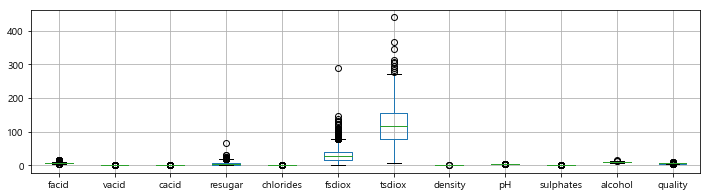

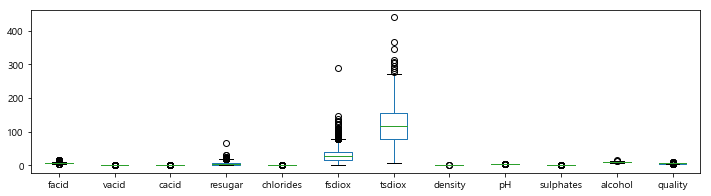

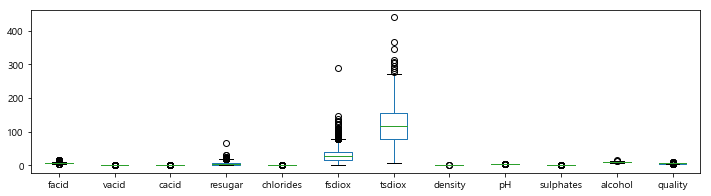

In [31]:
# 박스플롯을 이용한 피처셋 분포특성파악

X.boxplot(figsize=(12, 3))
# - X 데이터프레임 객체에 .boxplot 메서드로 모든 변수컬럼을 히스토그램으로 구현

X.plot.box(figsize=(12, 3))
# - X 데이터프레임객체에 .plot 시각화 메서드 중 .box함수를 사용해 구현

X.plot(kind = 'box', figsize=(12, 3))
# - X 데이터프레임객체에 .plot 시각화 메서드 중 kind옵션을 사용해 구현

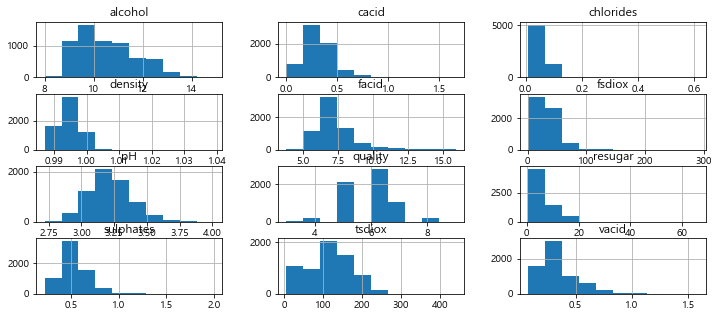

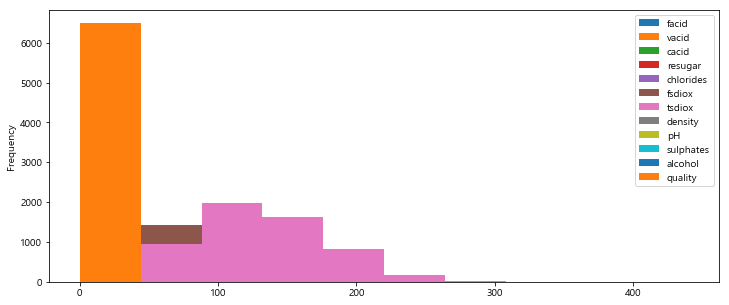

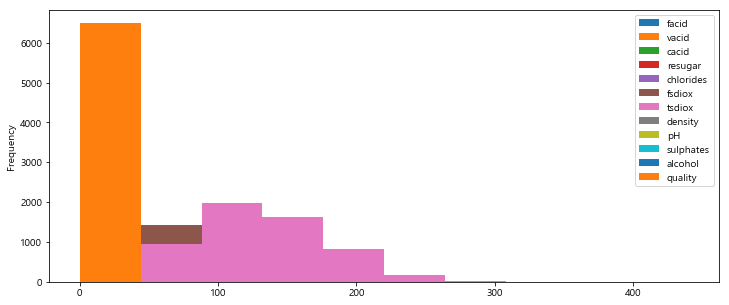

In [32]:
# 히스토그램을 이용한 피처셋 분포특성파악

X.hist(figsize=(12, 5))
# - X 데이터프레임 객체에 .hist 메서드로 모든 변수컬럼을 히스토그램으로 구현

X.plot.hist(figsize=(12, 5))
# - X 데이터프레임객체에 .plot 시각화 메서드 중 .hist함수를 사용해 구현

X.plot(kind = 'hist', figsize=(12, 5))
# - X 데이터프레임객체에 .plot 시각화 메서드 중 kind옵션을 사용해 구현

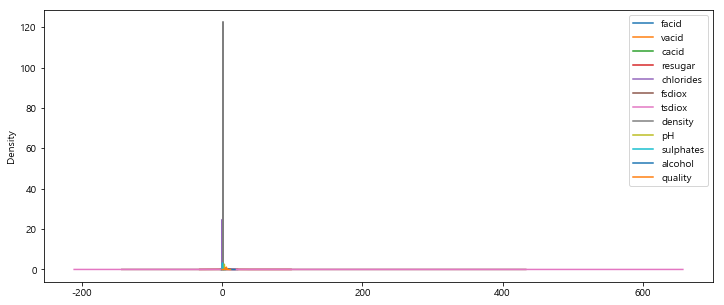

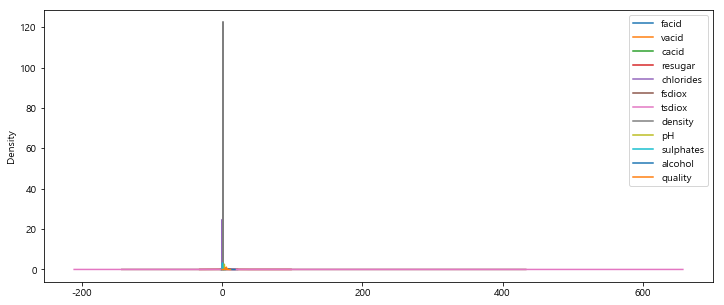

In [33]:
# 밀도곡선을 이용한 피처셋 분포특성파악

X.plot.kde(figsize=(12, 5))
# - X 데이터프레임객체에 .plot 시각화 메서드 중 .kde함수를 사용해 구현

X.plot(kind = 'kde', figsize=(12, 5))
# - X 데이터프레임객체에 .plot 시각화 메서드 중 kind옵션을 사용해 구현

### 피처셋과 클래스 관련성 파악

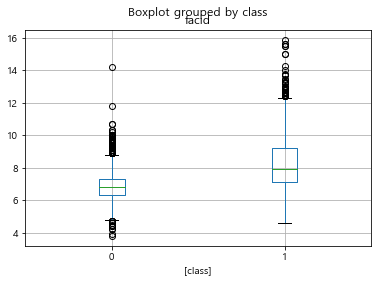

In [34]:
# 특정 피처에 따른 클래스 분류 가능성 탐색
box = df[['facid', 'class']].boxplot(by='class')
# - matplotlib.pyplot 이용

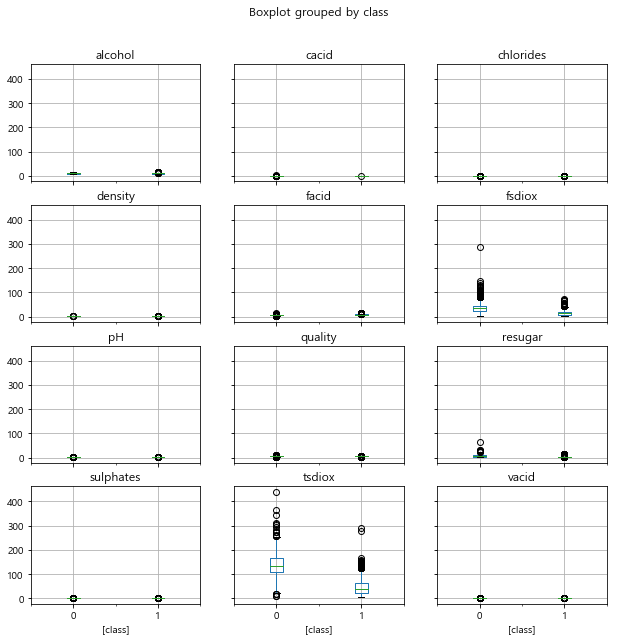

In [35]:
# 피처변수에 따른 클래스 분류 가능성 탐색
box = df.boxplot(by='class', figsize=(10, 10))
# - matplotlib.pyplot 이용

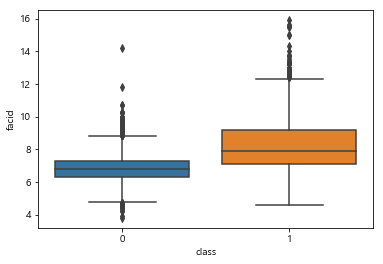

In [36]:
# 특정 피처에 따른 클래스 분류 가능성 탐색
sns.boxplot(x = "class", y = 'facid', data = df)
# - seaborn 라이브러리 이용

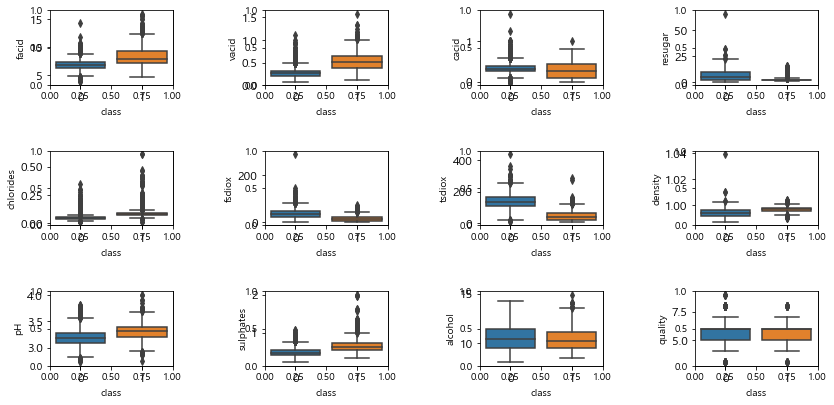

In [37]:
# 피처변수에 따른 클래스 분류 가능성 탐색
fig, axes = plt.subplots(3, 4, figsize = (12, 6))
for idx, feature in enumerate(list(df.columns)[:-1]):
    ax = fig.add_subplot(3, 4, idx + 1)
    box = sns.boxplot(x = 'class', y = feature, data = df, ax = ax)
    plt.setp(box.get_xticklabels(), fontsize = 12)
    plt.setp(box.get_yticklabels(), fontsize = 12)
fig.tight_layout() 
# - seaborn 라이브러리 이용

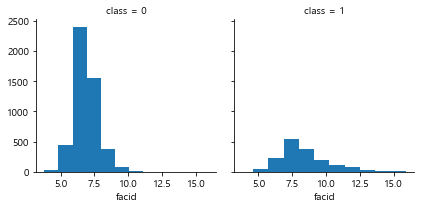

In [38]:
grid = sns.FacetGrid(df, col = 'class')
grid.map(plt.hist, 'facid', bins = 10)

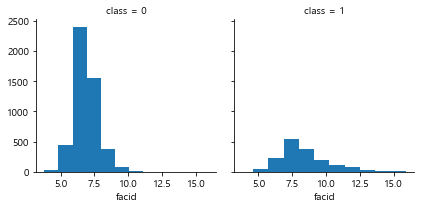

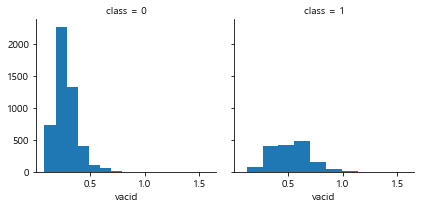

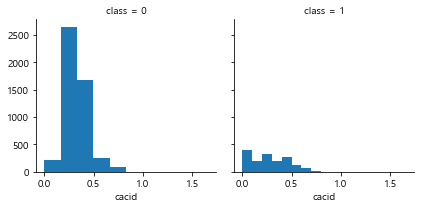

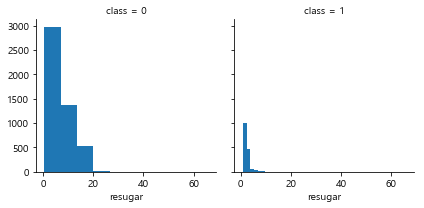

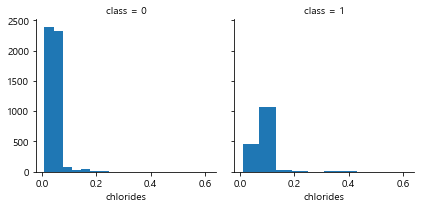

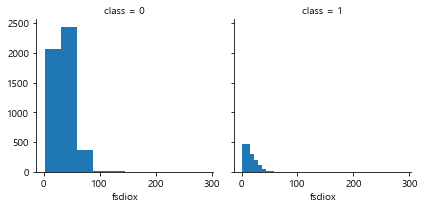

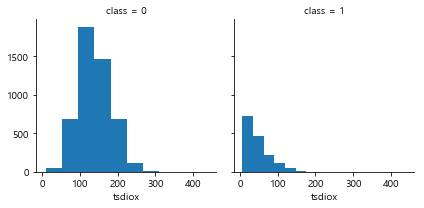

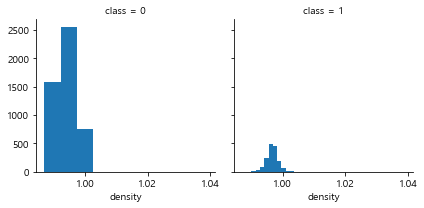

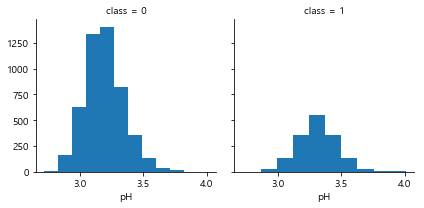

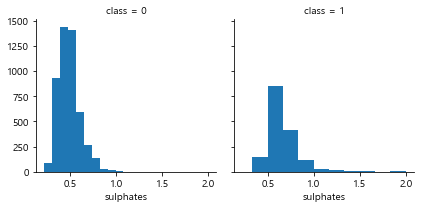

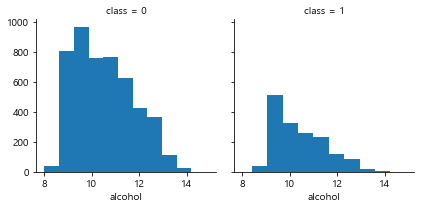

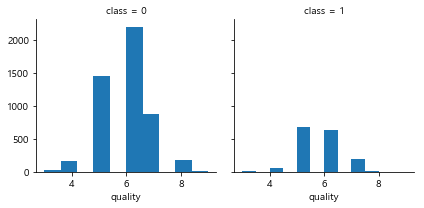

In [39]:
for idx, feature in enumerate(list(df.columns)[:-1]):
    grid = sns.FacetGrid(df, col = 'class')
    grid.map(plt.hist, feature, bins = 10)    

### 산점도 매트릭스 파악

In [40]:
df.corr()

,facid,vacid,cacid,resugar,chlorides,fsdiox,tsdiox,density,pH,sulphates,alcohol,quality,class
facid,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
vacid,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
cacid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
resugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
fsdiox,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
tsdiox,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


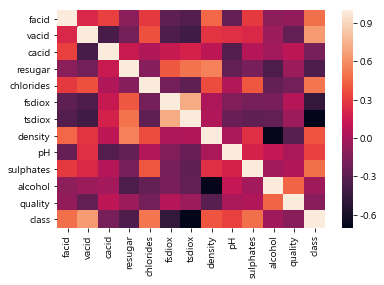

In [41]:
plt.figure()
ht = sns.heatmap(df.corr())

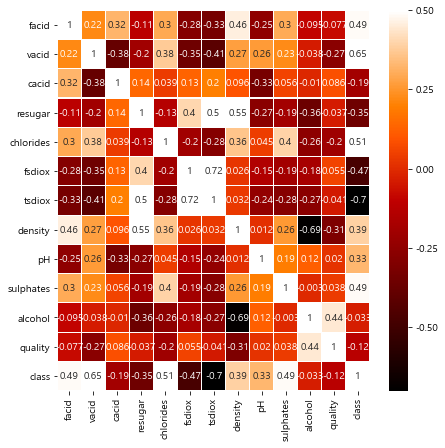

In [42]:
plt.figure(figsize = (7, 7))
ht = sns.heatmap(df.corr(), vmax = 0.5, cmap = plt.cm.gist_heat, linewidth = 0.1, linecolor = 'white', annot = True)

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


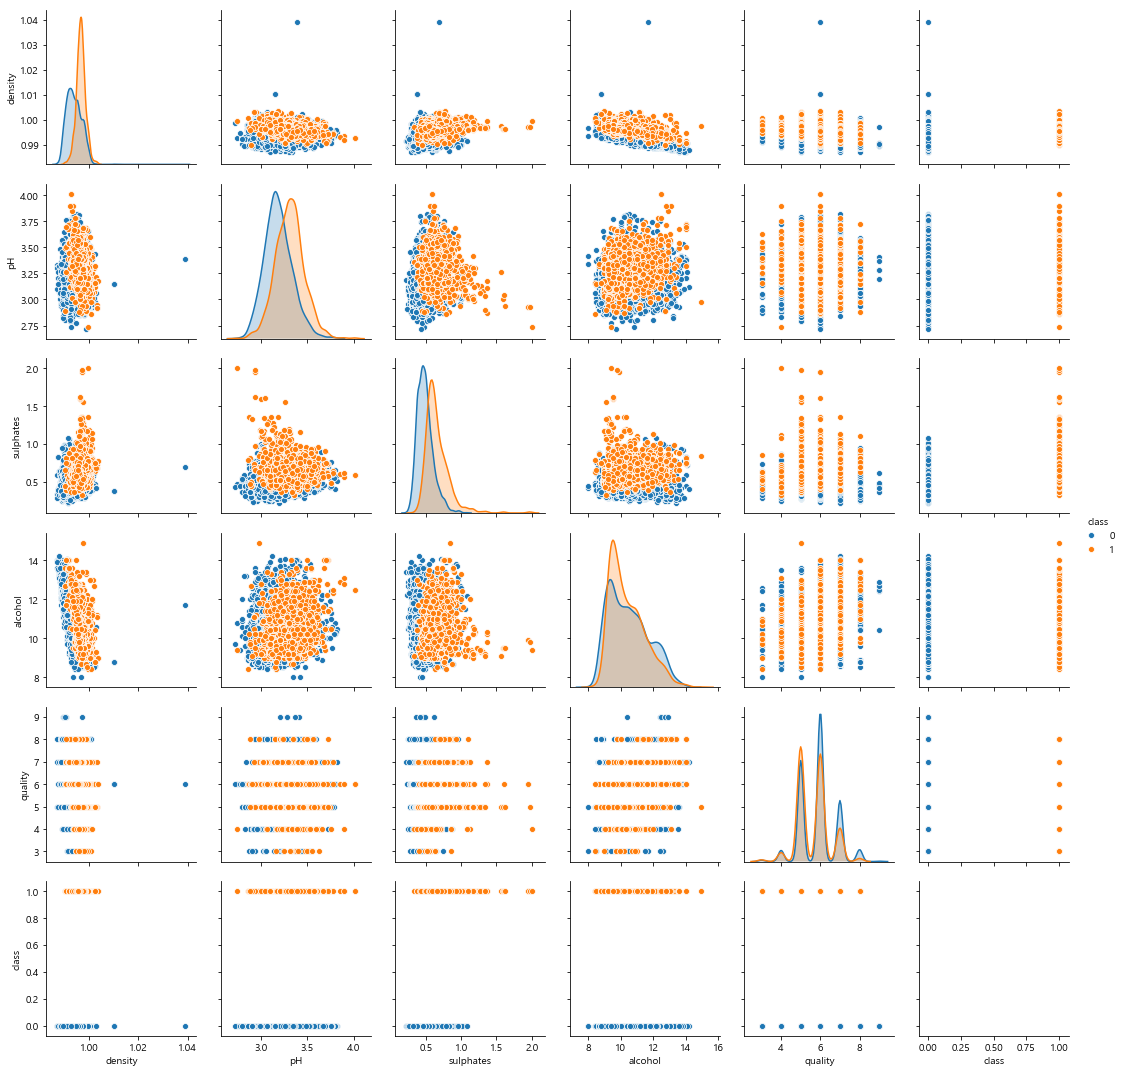

In [43]:
pp = sns.pairplot(df.iloc[:, 7:13], hue = 'class')

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:513: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1203: RuntimeWarning: invalid value encountered in less
  un

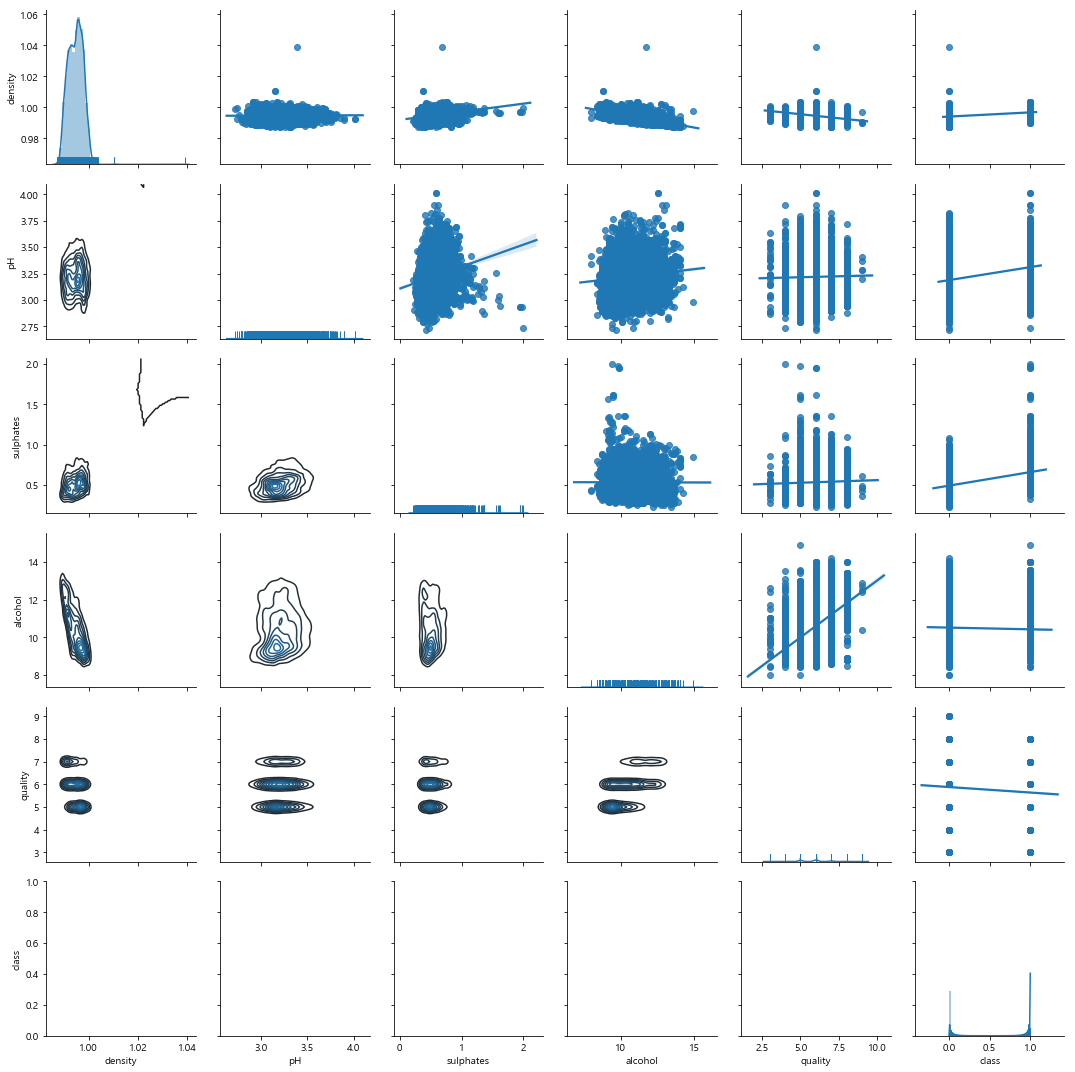

In [44]:
pair_grid = sns.PairGrid(df.iloc[:, 7:13]) 
pair_grid = pair_grid.map_upper(sns.regplot) 
pair_grid = pair_grid.map_lower(sns.kdeplot) 
pair_grid = pair_grid.map_diag(sns.distplot, rug = True) 

# <font color = 'blue'>피처변수셋 전처리</font>

### 피처셋 스케일링
* sklearn라이브러리 preprocessing모듈의 스케일링 함수 이용 최대/최소값이 각각 1, 0이 되도록 스케일링

In [45]:
# sklearn 라이브러리의 스케일링관련 모듈로딩
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

C:\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


#### 표준정규화 스케일링

In [46]:
# 표준정규화 스케일링
scaler = StandardScaler()
X_st = scaler.fit_transform(X)
X_st[0:3]

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
        -1.10013986, -1.44635852,  1.03499282,  1.81308951,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, -0.59764007,  1.1979747 ,
        -0.31132009, -0.86246863,  0.70148631, -0.11507303,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, -0.66069923,  1.02669737,
        -0.87476278, -1.09248586,  0.76818761,  0.25811972,  0.79795816,
        -0.58006813, -0.93722961]])

In [47]:
# 표준정규화 스케일링 결과확인
X_st = pd.DataFrame(X_st, columns = ['facid', 'vacid', 'cacid', 'resugar', 
                                     'chlorides', 'fsdiox', 'tsdiox', 'density', 
                                     'pH', 'sulphates', 'alcohol', 'quality'])
X_st.head(3)

,facid,vacid,cacid,resugar,chlorides,fsdiox,tsdiox,density,pH,sulphates,alcohol,quality
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.93723
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.93723
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.93723


#### 최대최소를 1과 0으로 하는 스케일링

In [48]:
# 최대최소를 1과 0으로 하는 스케일링
scaler = MinMaxScaler()
X_mm = scaler.fit_transform(X)
X_mm[0:3]

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.29752066, 0.41333333, 0.        , 0.01993865, 0.11129568,
        0.03472222, 0.06451613, 0.20609215, 0.6124031 , 0.19101124,
        0.20289855, 0.33333333],
       [0.33057851, 0.53333333, 0.        , 0.03067485, 0.14784053,
        0.08333333, 0.140553  , 0.18681319, 0.37209302, 0.25842697,
        0.26086957, 0.33333333],
       [0.33057851, 0.45333333, 0.02409639, 0.02607362, 0.13787375,
        0.04861111, 0.11059908, 0.19066898, 0.41860465, 0.24157303,
        0.26086957, 0.33333333]])

In [49]:
# 최대최소를 1과 0으로 하는 스케일링 결과확인
X_mm = pd.DataFrame(X_mm, columns = ['facid', 'vacid', 'cacid', 'resugar', 
                                     'chlorides', 'fsdiox', 'tsdiox', 'density', 
                                     'pH', 'sulphates', 'alcohol', 'quality'])
X_mm.head(3)

,facid,vacid,cacid,resugar,chlorides,fsdiox,tsdiox,density,pH,sulphates,alcohol,quality
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333


#### 이상치분포를 보정한 스케일링

In [50]:
# 이상치분포를 보정한 스케일링
scaler = RobustScaler()
X_rb = scaler.fit_transform(X)
X_rb[0:3]

array([[ 0.30769231,  2.41176471, -2.21428571, -0.17460317,  1.07407407,
        -0.75      , -1.06329114,  0.62580645,  1.42857143,  0.29411765,
        -0.5       , -1.        ],
       [ 0.61538462,  3.47058824, -2.21428571, -0.06349206,  1.88888889,
        -0.16666667, -0.64556962,  0.41075269, -0.04761905,  1.        ,
        -0.27777778, -1.        ],
       [ 0.61538462,  2.76470588, -1.92857143, -0.11111111,  1.66666667,
        -0.58333333, -0.81012658,  0.45376344,  0.23809524,  0.82352941,
        -0.27777778, -1.        ]])

In [51]:
# 이상치분포를 보정한 스케일링 결과확인
X_rb = pd.DataFrame(X_rb, columns = ['facid', 'vacid', 'cacid', 'resugar', 
                                     'chlorides', 'fsdiox', 'tsdiox', 'density', 
                                     'pH', 'sulphates', 'alcohol', 'quality'])
X_rb.head(3)

,facid,vacid,cacid,resugar,chlorides,fsdiox,tsdiox,density,pH,sulphates,alcohol,quality
0,0.307692,2.411765,-2.214286,-0.174603,1.074074,-0.750000,-1.063291,0.625806,1.428571,0.294118,-0.500000,-1.0
1,0.615385,3.470588,-2.214286,-0.063492,1.888889,-0.166667,-0.645570,0.410753,-0.047619,1.000000,-0.277778,-1.0
2,0.615385,2.764706,-1.928571,-0.111111,1.666667,-0.583333,-0.810127,0.453763,0.238095,0.823529,-0.277778,-1.0


#### 스케일링 결과 종합비교

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


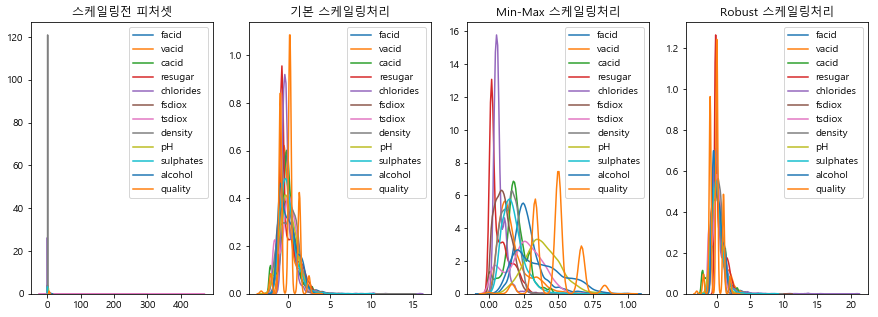

In [52]:
# 스케일링 결과 종합비교
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize = (15, 5))

ax1.set_title('스케일링전 피처셋')
for i in X.columns:
    sns.kdeplot(X[i], ax=ax1)

ax2.set_title('기본 스케일링처리')
for i in X.columns:
    sns.kdeplot(X_st[i], ax=ax2)
    
ax3.set_title('Min-Max 스케일링처리')
for i in X.columns:
    sns.kdeplot(X_mm[i], ax=ax3)
    
ax4.set_title('Robust 스케일링처리')
for i in X.columns:
    sns.kdeplot(X_rb[i], ax=ax4)
    
# - Robust 스케일링처리 결과가 가장 피처셋의 분포를 전체적으로 통일시켜주었음 

In [53]:
# Robust 스케일링처리된 피처셋의 기술통계
X_rb.describe()

,facid,vacid,cacid,resugar,chlorides,fsdiox,tsdiox,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.165621,0.292153,0.061666,0.387815,0.334587,0.063555,-0.028550,-0.041584,0.040480,0.125108,0.106556,-0.181622
std,0.997257,0.968450,1.037985,0.755207,1.297541,0.739558,0.715467,0.644876,0.765653,0.875329,0.662618,0.873255
min,-2.461538,-1.235294,-2.214286,-0.380952,-1.407407,-1.166667,-1.417722,-1.673118,-2.333333,-1.705882,-1.277778,-3.000000
25%,-0.461538,-0.352941,-0.428571,-0.190476,-0.333333,-0.500000,-0.518987,-0.548387,-0.476190,-0.470588,-0.444444,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.538462,0.647059,0.571429,0.809524,0.666667,0.500000,0.481013,0.451613,0.523810,0.529412,0.555556,0.000000
max,6.846154,7.588235,9.642857,9.968254,20.888889,10.833333,4.075949,9.481720,3.809524,8.764706,2.555556,3.000000


# <font color = 'blue'>타겟변수 그래프 탐색</font>

In [54]:
df.head(2) # 변수컬럼 이름확인

,facid,vacid,cacid,resugar,chlorides,fsdiox,tsdiox,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


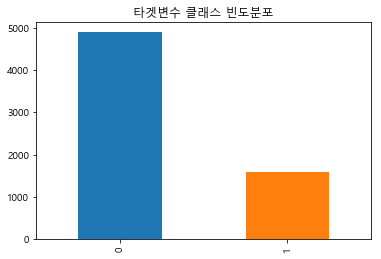

In [55]:
y.value_counts().plot.bar(title='타겟변수 클래스 빈도분포')
# 또는 y.value_counts().plot(kind = 'bar', title='타겟변수 클래스 빈도분포') 이렇게 코딩도 가능함

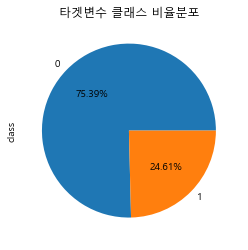

In [56]:
y.value_counts().plot.pie(title='타겟변수 클래스 비율분포', autopct='%.2f%%')
# 또는 y.value_counts().plot(kind='pie', title='타겟변수 클래스 비율분포', autopct='%.2f%%') 이렇게 코딩도 가능함

In [57]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y == l, 0],
            X[y == l, 1],
            c = c, label = l, marker = m
        )
    plt.title(label)
    plt.legend(loc = 'best')

C:\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


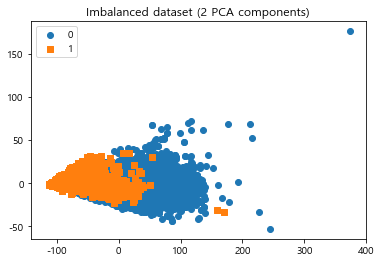

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

# <font color = 'blue'>타겟변수 전처리</font>

### 타겟변수 클래스별 빈도와 비율 분포

In [59]:
# pandas DataFrame에서 타겟 변수컬럼 인덱싱해서 확인
print('클래스 레이블:', pd.unique(df['class']))
print('클래스 빈도수:\n', pd.value_counts(df['class']))
print()

print('클래스 레이블:', df['class'].unique())
print('클래스 빈도수:\n', df['class'].value_counts())
print()

# pandas DataFrame에서 타겟변수 별도추출한 시리즈 객체로 확인
print('클래스 레이블:', pd.unique(y))
print('클래스 빈도수:\n', pd.value_counts(y))
print()

print('클래스 레이블:', y.unique())
print('클래스 빈도수:\n', y.value_counts())

클래스 레이블: [1 0]
클래스 빈도수:
 0    4898
1    1599
Name: class, dtype: int64

클래스 레이블: [1 0]
클래스 빈도수:
 0    4898
1    1599
Name: class, dtype: int64

클래스 레이블: [1 0]
클래스 빈도수:
 0    4898
1    1599
Name: class, dtype: int64

클래스 레이블: [1 0]
클래스 빈도수:
 0    4898
1    1599
Name: class, dtype: int64


In [60]:
target_labelcount = {k: v for k, v in zip(y.unique(), y.value_counts())}
target_labelcount
# - 클래스 유형별 빈도수 같이 출력

{1: 4898, 0: 1599}

In [61]:
print(type(target_labelcount))
print(target_labelcount.keys())
print(target_labelcount.values())
print(target_labelcount.items())
print()

for k, v in target_labelcount.items(): 
    pct = v / sum(target_labelcount.values()) 
    print(f"레이블: {k}, 빈도수: {v}, 비율: {pct:0.3f}") 

<class 'dict'>
dict_keys([1, 0])
dict_values([4898, 1599])
dict_items([(1, 4898), (0, 1599)])

레이블: 1, 빈도수: 4898, 비율: 0.754
레이블: 0, 빈도수: 1599, 비율: 0.246


### 타겟변수 숫자레이블 문자변환
* 딥러닝에서는 타겟변수가 문자열이 아닌 숫자로 변경해야 딥러닝 연산이 가능해짐
* 현재 타깃변수인 class에는 숫자 0, 1로 되어 있어서 그대로 사용가능함
* 타겟변수가 숫자인 경우에는 이진/이항인 경우 0, 1로 사용하고, 
<br> 다항인 경우 0, 1, 2를 원핫인코딩 방식으로 변경해서 사용함 

In [62]:
# 타겟변수 클래스 레이블 붙이기
df['class2'] = df['class'].map({1:'Red', 0:'White'})
df['class2'] = df['class2'].astype('category')
df.head(3)

,facid,vacid,cacid,resugar,chlorides,fsdiox,tsdiox,density,pH,sulphates,alcohol,quality,class,class2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,Red


In [63]:
# numpy이용 반응(종속)변수 클래스별 빈도수 도출
import numpy as np
print('클래스 레이블:', np.unique(df['class']))
print('클래스 레이블:', np.unique(df['class2']))
print('클래스 빈도수:', np.bincount(df['class']))

클래스 레이블: [0 1]
클래스 레이블: ['Red' 'White']
클래스 빈도수: [4898 1599]


In [64]:
# 현재 클래스 분포비율
for csn, csl, csv in zip(df['class'].unique(), df['class2'].unique(), df['class'].value_counts()):
    pct = csv / df['class'].value_counts().sum() 
    print(f"레이블 {csn:d}: {csl:5s}, 빈도수: {csv}, 비율: {pct:0.3f}") 

레이블 1: Red  , 빈도수: 4898, 비율: 0.754
레이블 0: White, 빈도수: 1599, 비율: 0.246


# <font color = 'blue'>타겟변수 균형샘플 만들기</font>
* 타겟변수의 클래스가 불균형(Imbalanced datasets)인 상태에서는 특정 클래스에 대한 학습을 더 강하게 하게 되어
<br>각 클래스별 정확도, 즉 민감도(1을 잘 찾는 비율)와 특이도(0을 잘 찾는 비율)가 균형을 이루지 못하게 됨
* 클래스 비율이 너무 차이나면(highly-imbalanced data) 우세한 클래스를 택하는 모형의 정확도가 높아져 성능판별이 어려워짐
* 정확도(accuracy)가 높아도 데이터 갯수가 적은 클래스의 재현율(recall-rate)이 급격히 작아지는 현상이 발생함

In [65]:
# 불균형 클래스 샘플링 라이브러리 로딩
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.combine import *
# - imblearn 라이브러리의 uner_sampling, over_sampling, combine 모듈에서 
#   특정함수 하나를 지정해서 로딩하는 것이 아니라 와일드카드(*) 표시를 작성해
#   모든 소속함수를 함수명 그대로 단독으로 사용할 수 있도록 로딩함

C:\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


### 1. 언더샘플링(Under-Sampling),
* 소수(minority) 클래스의 크기를 기준으로 다수(majority) 클래스 규모를 축소(shrink)하는 방법
* 메모리가 가능하다면 일부러 언더샘플링을 통해 정보의 손실을 감수할 필요가 없음
* 그러나 일부 분류경계선에 위치한 양쪽클래스를 제거해 분류경계선을 명확하게 하는 클린징 기법으로 활용성 좋음

#### 1.1 랜덤언더샘플링(Random Under-Sampling)
* 무작위로 다수 클래스의 예제를 제거하여 클래스 분포의 균형을 맞춤  
* 장점: training set이 많을 때 샘플 수를 줄임으로써 저장 문제나 실행 속도 문제를 개선함
* 단점: 원래 있던 데이터를 작게 만들면서 중요한 정보를 누락 할 수 있으며, 정확한 대표성을 가지지 못하면, 부정확한 결과가 나옴<pre>
<img src = './../../images/undersampling.png'>

In [66]:
# 랜덤언더샘플링 실시
X_rb_un, y_un = RandomUnderSampler(random_state=0).fit_sample(X_rb, y)

print(f'   원래 클래스 레이블 분포: {np.bincount(y)}, 전체합: {sum(np.bincount(y))}')
print(f'랜덤언더샘플링 클래스 분포: {np.bincount(y_un)}, 전체합: {sum(np.bincount(y_un))}')
print()
print(f'        원래 피처셋 레코드 갯수: {len(X)}')
print(f'랜덤언더샘플 피처셋 레코드 갯수: {len(X_rb_un)}')

   원래 클래스 레이블 분포: [4898 1599], 전체합: 6497
랜덤언더샘플링 클래스 분포: [1599 1599], 전체합: 3198

        원래 피처셋 레코드 갯수: 6497
랜덤언더샘플 피처셋 레코드 갯수: 3198


#### 1.2 토멕링크제거 샘플링(Tomek links)
* 두 클래스 경계선에서 위치한 가장 가까운 쌍을 이루는 양쪽 클래스 집합(Tomek-links)을 
<br>노이즈로 간주해 삭제함으로써 언더샘플링 또는 데이터클리닝 효과를 거둠 
<img src = './../../images/tomek.png'><pre>

In [67]:
# 토멕샘플링 실시
from imblearn.under_sampling import TomekLinks
X_rb_tm, y_tm = TomekLinks(random_state=0).fit_sample(X_rb, y)

print(f'    원래 클래스 레이블 분포: {np.bincount(y)}, 전체합: {sum(np.bincount(y))}')
print(f'토멕링스 클래스 레이블 분포: {np.bincount(y_tm)}, 전체합: {sum(np.bincount(y_tm))}')
print()
print(f'    원래 피처셋 레코드 갯수: {len(X)}')
print(f'토멕링스 피처셋 레코드 갯수: {len(X_rb_tm)}')

C:\Anaconda3\lib\site-packages\imblearn\utils\deprecation.py:45: DeprecationWarning: 'random_state' is deprecated from 0.4 and will be removed in 0.6 for the estimator <class 'imblearn.under_sampling._prototype_selection._tomek_links.TomekLinks'>.
  category=DeprecationWarning)


    원래 클래스 레이블 분포: [4898 1599], 전체합: 6497
토멕링스 클래스 레이블 분포: [4893 1599], 전체합: 6492

    원래 피처셋 레코드 갯수: 6497
토멕링스 피처셋 레코드 갯수: 6492


#### 1.3 최근접이웃 참조데이터 편집 샘플링(ENN: the edited nearest neighbour method)
* 참조 데이터셋의 모든 데이터를 k-NN을 이용해 분류를 수행한 다음
<br>다수 클래스 중에서 원래 클래스가 아닌 다른 클래스로 오분류된 데이터들을 참조 데이터셋에서 제거함 
<img src = './../../images/enn.png'><pre>

In [68]:
# 최근접이웃 참조데이터 편집 샘플링 실시
from imblearn.under_sampling import EditedNearestNeighbours
X_rb_en, y_en = EditedNearestNeighbours(random_state=0).fit_sample(X_rb, y)

print(f'      원래 클래스 레이블 분포: {np.bincount(y)}, 전체합: {sum(np.bincount(y))}')
print(f'kNN참조데이터편집 레이블 분포: {np.bincount(y_en)}, 전체합: {sum(np.bincount(y_en))}')
print()
print(f'             원래 피처셋 레코드 갯수: {len(X)}')
print(f'kNN참조데이터편집 피처셋 레코드 갯수: {len(X_rb_en)}')

C:\Anaconda3\lib\site-packages\imblearn\utils\deprecation.py:45: DeprecationWarning: 'random_state' is deprecated from 0.4 and will be removed in 0.6 for the estimator <class 'imblearn.under_sampling._prototype_selection._edited_nearest_neighbours.EditedNearestNeighbours'>.
  category=DeprecationWarning)


      원래 클래스 레이블 분포: [4898 1599], 전체합: 6497
kNN참조데이터편집 레이블 분포: [4840 1599], 전체합: 6439

             원래 피처셋 레코드 갯수: 6497
kNN참조데이터편집 피처셋 레코드 갯수: 6439


### 2. 오버샘플링(Over-Sampling)
* 다수(majority) 클래스의 크기를 기준으로 소수(minority) 클래스 규모를 확대(expand)하는 방법 
* 소수 클래스 비율을 10%씩 늘려가면서 분류분석을 적용해 훈련데이터에 대한 목표정확도의 상승이 관측 될 때까지 오버샘플링을 실시하기도함

#### 2.1 랜덤오버샘플링(Random Over-Sampling)
* 소수 클래스의 높은 대표성을 위해 소수 클래스의 인스턴스의 수를 단순하게 복사해서 늘림
* 장점: 정보의 손실이 없고, 언더 샘플링보다 성능이 좋음
* 단점: 소수 클래스를 복사하기 때문에 과적합의 가능성이 있음
<img src = './../../images/oversampling.png'>

In [69]:
# 랜덤오버샘플링 실시
from imblearn.over_sampling import RandomOverSampler
X_rb_ov, y_ov = RandomOverSampler(random_state=0).fit_sample(X_rb, y)

print(f'   원래 클래스 레이블 분포: {np.bincount(y)}, 전체합: {sum(np.bincount(y))}')
print(f'랜덤오버샘플링 클래스 분포: {np.bincount(y_ov)}, 전체합: {sum(np.bincount(y_ov))}')
print()
print(f'        원래 피처셋 레코드 갯수: {len(X)}')
print(f'랜덤오버샘플 피처셋 레코드 갯수: {len(X_rb_ov)}')

   원래 클래스 레이블 분포: [4898 1599], 전체합: 6497
랜덤오버샘플링 클래스 분포: [4898 4898], 전체합: 9796

        원래 피처셋 레코드 갯수: 6497
랜덤오버샘플 피처셋 레코드 갯수: 9796


#### 2.2 합성샘플 오버샘플링(Synthetic Minority Over-Sampling Technique: SMOTE)
* 소수 클래스에 속하는 데이터를 새롭게 합성한 클래스를 추가해 과적합을 피하는 방법 
* 장점: 클래스를 단순복사할 때 발생하는 과적합 문제를 합성 예제 생성으로 완화시킬 수 있으며, 유용한 데이터 손실이 없음
* 단점: 해당클래스의 기본분포를 고려하지 않고 두 클래스 경계에 있는 샘플이나 노이즈샘플을 고려하지 않아 
<br>클래스 겹칩이나 추가노이즈가 발생할 수 있으며, 고차원 피처셋에서는 효과적이지 않음
<img src = './../../images/smote.png'>

In [70]:
# 합성샘플 오버샘플링 실시
from imblearn.over_sampling import SMOTE
X_rb_sm, y_sm = SMOTE(random_state=0).fit_sample(X_rb, y)

print(f'원래 클래스 레이블 분포: {np.bincount(y)}, 전체합: {sum(np.bincount(y))}')
print(f'      SMOTE 클래스 분포: {np.bincount(y_sm)}, 전체합: {sum(np.bincount(y_sm))}')
print()
print(f'원래 피처셋 레코드 갯수: {len(X)}')
print(f'      SMOTE 클래스 분포: {len(X_rb_sm)}')

원래 클래스 레이블 분포: [4898 1599], 전체합: 6497
      SMOTE 클래스 분포: [4898 4898], 전체합: 9796

원래 피처셋 레코드 갯수: 6497
      SMOTE 클래스 분포: 9796


#### 2.3 적응형 합성샘플 오버샘플링(Adaptive Synthetic Sampling: ADASYN)
* SMOTE의 문제를 해결하기 위해 제안된 적응형 방법의 하나로 
<br>데이터 분포를 고려하여 클래스간의 경계면에 가까울수록 더 많은 소수 클래스의 데이터를 합성함
* SMOTE의 수정된 버전으로 소수 클래스의 세부적인 분포특성을 고려해 오버샘플링을 해줌
* Security Samples : 분류기의 성능을 향상시킬 수 있는 데이터 포인트 -> 최근접이웃기법으로 유사한 이웃의 평균특성을 고려함
* Noise Samples: 분류기의 성능을 감소시키는 데이터 포인트 -> 아무것도 선정하지 않음
* Border Samples: 둘중에 하나로 분류하기 힘든 데이터 포인트 -> 가장 가까운 이웃 샘플을 선택해 복제함  

In [71]:
# 적응형합성샘플 오버샘플링 실시
from imblearn.over_sampling import ADASYN
X_rb_as, y_as = ADASYN(random_state=0).fit_sample(X_rb, y)

print(f'원래 클래스 레이블 분포: {np.bincount(y)}, 전체합: {sum(np.bincount(y))}')
print(f'     ADASYN 클래스 분포: {np.bincount(y_as)}, 전체합: {sum(np.bincount(y_as))}')
print()
print(f'원래 피처셋 레코드 갯수: {len(X)}')
print(f'     ADASYN 클래스 분포: {len(X_rb_as)}')

원래 클래스 레이블 분포: [4898 1599], 전체합: 6497
     ADASYN 클래스 분포: [4898 4910], 전체합: 9808

원래 피처셋 레코드 갯수: 6497
     ADASYN 클래스 분포: 9808


### 3. 콤비네이션샘플링(Combining Over-and Under-Sampling)
* 언더샘플링과 오버샘플링의 방법을 적절히 결합해 소수 클래스 데이터는 증폭시키고 다수 클래스 데이터는 제거해 클래스간 비율을 조정

#### 3.1 SMOTETomek: SMOTE + TomekLinks
* 소수클래스에 속하는 데이터를 합성해 클래스를 추가하는 오버샘플링인 SMOTE를 수행한 뒤,<br>두 클래스 경계선에 위치한 가장 가까운 쌍을 이루는 양쪽 클래스 집합(Tomek-links)을 노이즈로 간주해 삭제하는 언더샘플링과 클리닝실시

In [72]:
# SMOTETomek 콤비네이션샘플링 실시
from imblearn.combine import SMOTETomek
X_rb_st, y_st = SMOTETomek(random_state=0).fit_sample(X_rb, y)

print(f'원래 클래스 레이블 분포: {np.bincount(y)}, 전체합: {sum(np.bincount(y))}')
print(f'SMOTETomek  클래스 분포: {np.bincount(y_st)}, 전체합: {sum(np.bincount(y_st))}')
print()
print(f'원래 피처셋 레코드 갯수: {len(X)}')
print(f'SMOTETomek 피처셋 레코드 갯수: {len(X_rb_st)}')

원래 클래스 레이블 분포: [4898 1599], 전체합: 6497
SMOTETomek  클래스 분포: [4897 4897], 전체합: 9794

원래 피처셋 레코드 갯수: 6497
SMOTETomek 피처셋 레코드 갯수: 9794


#### 3.2 SMOTEENN: SMOTE + ENN
* 소수클래스에 속하는 데이터를 합성해 클래스를 추가하는 오버샘플링인 SMOTE를 수행한 뒤
<br>k-nn을 이용해 분류를 수행해 오분류된 데이터들을 참조데이터셋에서 제거하는 언더샘플링을 통해
<br> 보다 부드러운 의사결정경계를 만들고, TomekLinks보다 많은 예제를 제거하는 경향이 있음

In [73]:
# SMOTEENN 콤비네이션샘플링 실시
from imblearn.combine import SMOTEENN
X_rb_se, y_se = SMOTEENN(random_state=0).fit_sample(X_rb, y)

print(f'   원래 클래스 레이블 분포: {np.bincount(y)}, 전체합: {sum(np.bincount(y))}')
print(f'SMOTEENN샘플링 클래스 분포: {np.bincount(y_se)}, 전체합: {sum(np.bincount(y_se))}')
print()
print(f'        원래 피처셋 레코드 갯수: {len(X)}')
print(f'SMOTEENN샘플 피처셋 레코드 갯수: {len(X_rb_se)}')

   원래 클래스 레이블 분포: [4898 1599], 전체합: 6497
SMOTEENN샘플링 클래스 분포: [4828 4866], 전체합: 9694

        원래 피처셋 레코드 갯수: 6497
SMOTEENN샘플 피처셋 레코드 갯수: 9694


# <font color = 'blue'>딥러닝 모델링</font>

### 딥러닝 라이브러리 로딩

In [74]:
# 딥러닝 관련 라이브러리
import tensorflow as tf
# - 딥러닝 학습알고리즘

from keras.models import Sequential
# - 딥러닝 학습계층을 순차적으로 쌓아올릴 수 있도록 해줌

from keras.layers import Dense, Activation
# - 딥러닝 학습계층별 노드/유닛을 밀집시켜 학습방법을 설정할 수 있도록 해줌

C:\Anaconda3\lib\site-packages\tensorflow\python\util\tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
C:\Anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4900: ResourceWarning: unclosed file <_io.TextIOWrapper name='C:\\Users\\databarista\\.keras\\keras.json' mode='r' encoding='cp949'>
  _config = json.load(open(_config_path))
C:\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
Using TensorFlow backend.


### 랜덤 시드넘버 설정

In [75]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

import numpy as np
np.random.seed(myseed)
tf.set_random_seed(myseed)

### 모델 훈련계층 설정

In [76]:
# 딥러닝 학습계층 시퀀스객체 로딩
md = Sequential()
# - 딥러닝 학습계층을 순차적으로 쌓아올릴 수 있는 Sequential()메서드를 md라는 객체로 로딩함

# 딥러닝 학습계층 설계
# - 입력층(12개노드)-은닉층(30개노드)-은닉층(12개노드)-은닉층(8개노드)-출력층(1개노드)

md.add(Dense(30, input_dim = 12, activation = 'relu'))
# - 딥러닝 학습계층 1번째로 input_dim 으로 입력층 + 은닉층 역할 수행
# - input_dim은 피처셋의 예측(입력;독립)변수 갯수로 입력층 12개 노드로 지정
#   첫번째 레이어 이후로는 입력개수 지정 불필요
#   앞 레이어의 출력갯수가 이후 뒤 레이어의 입력개수가 됨
# - Dense 함수로 은닉층에 30개의 노드를 만듦
# - activation = 'relu'로 활성화함수 지정해 해당층의 학습결과를 다음층으로 넘김

md.add(Dense(12, activation = 'relu'))
# - 딥러닝 학습계층 2번째로 은닉층 역할 수행
# - Dense 함수로 은닉층에 12개의 노드를 만듦
# - activation = 'relu'로 활성화함수 지정해 해당층의 학습결과를 다음층으로 넘김

md.add(Dense(8, activation = 'relu'))
# - 딥러닝 학습계층 3번째로 은닉층 역할 수행
# - Dense 함수로 은닉층에 8개의 노드를 만듦
# - activation = 'relu'로 활성화함수 지정해 해당층의 학습결과를 다음층으로 넘김

md.add(Dense(1, activation = 'sigmoid'))
# - 딥러닝 학습계층 4번째로 출력층 역할
# - 출력값을 1개로 정해서 보여주기 위해서 1개 노드로 설정함
# - activation = 'sigmoid'로 활성화함수 지정해 
#   최종적인 출력값을 0 또는 1의 확률값으로 도출

# 모델설계 계층구조 요약
md.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                390       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [77]:
# 다른 방식으로 딥러닝 계층설계
md = Sequential()

md.add(Dense(30, input_shape = (12, )))
md.add(Activation('relu'))

md.add(Dense(12))
md.add(Activation('relu'))

md.add(Dense(8))
md.add(Activation('relu'))

md.add(Dense(1))
md.add(Activation('sigmoid'))

md.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                390       
_________________________________________________________________
activation_1 (Activation)    (None, 30)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 12)                372       
_________________________________________________________________
activation_2 (Activation)    (None, 12)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
activation_3 (Activation)    (None, 8)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
__________

### 모델 훈련방법 설정

In [78]:
# 준비된 학습계층의 학습방법 설정
md.compile(loss = 'binary_crossentropy', 
           optimizer = 'adam', metrics = ['accuracy'])

# - loss: 학습시 오차를 어떻방법으로 계산할지 설정
# - optimizser: 발생하는 오차를 어떤방법으로 줄여나갈지 설정
#   binary_crossentropy: 이항분류(binary-class classification)에 적합함
#   categorical_crossentropy: 다항분류(multi-class classification)에 적합함
# - metrics: 모형의 성능을 평가하는 기준으로 어떤 것을 사용할지 설정

### 모델 훈련실시

In [79]:
# 딥러닝 모델 최적화 훈련진행
# - 준비된 훈련계층과 훈련방법에 따라 미니배치(mini-batch) 방식으로 최적화 훈련진행
# - 훈련데이터셋을 한번에 투입해 또는 한개 샘플씩 학습을 하지 않고, 
#   일부(batch_size) 단위샘플로 나누어서 부분적으로 학습을 진행함
# - 미니배치를 하나씩 학습모델에 투입해 손실함수값을 줄이기 위한 파라미터(가중치, 편향)를 조율해 나감
# - 각 미니배치별 손실함수값을 구하고, 이들의 평균적인 오차와 정확도를 해당 모델의 성능으로 판단함
# - 또한 미니배치 단위샘플을 모두 사용하는 일련의 학습과정(에포크: epoch)을 
#   한번에 끝내는 것이 아니라 여러차례 반복실시해 모델의 성능을 개선해 나감  

md.fit(X_rb, y, batch_size = 10, epochs = 200)
# - 훈련셋을 10개 샘플씩 나누어 미니배치를 여러개 만들고 
#   이를 모두 활용하는 딥러닝 학습을 총 200번 반복실시함

# - batch_size: 훈련데이터셋중에서 몇개 샘플을 미니배치(mini-batch)로 만들것인지 설정
#   적게설정: 빠른 훈련속도이점. 단위샘플셋에 따라 학습편차가 많이 발생. 병렬연산 못하고 하드웨어 자원낭비
#   많이설정: 훈련속도가 느려짐. 지역최소값(local minimum)에 빠질 수 있음. 하드웨어 자원에 부하가 많이 발생함)
# - epochs: 미니배치를 모두 처리하는 일련의 학습을 몇 번 정도 실시할지 설정
#   적게설정: 파라미터조율이 충분하지 않아서 과소적합 가능성
#   많이설정: 파라미터조율이 지나쳐 과대적합 가능성

# - 출력내용 중 
#   loss:훈련셋 오차, acc:훈런셋 정확도, 
#   ETA:estimated time of arrival
#   step: Weight와 Bias를 1회 업데이트하는 단위작업

Epoch 1/200
6497/6497 [==============================] - 1s 168us/step - loss: 0.1163 - acc: 0.9734
Epoch 2/200
6497/6497 [==============================] - 1s 99us/step - loss: 0.0287 - acc: 0.9943
Epoch 3/200
6497/6497 [==============================] - 1s 85us/step - loss: 0.0222 - acc: 0.9957
Epoch 4/200
6497/6497 [==============================] - 1s 97us/step - loss: 0.0191 - acc: 0.9963
Epoch 5/200
6497/6497 [==============================] - 1s 90us/step - loss: 0.0170 - acc: 0.9965
Epoch 6/200
6497/6497 [==============================] - 1s 88us/step - loss: 0.0159 - acc: 0.9969
Epoch 7/200
6497/6497 [==============================] - 1s 89us/step - loss: 0.0149 - acc: 0.9966
Epoch 8/200
6497/6497 [==============================] - 1s 93us/step - loss: 0.0134 - acc: 0.9969
Epoch 9/200
6497/6497 [==============================] - 1s 85us/step - loss: 0.0126 - acc: 0.9968
Epoch 10/200
6497/6497 [==============================] - 1s 103us/step - loss: 0.0119 - acc: 0.9972
Epoch 1

6497/6497 [==============================] - 1s 225us/step - loss: 0.0033 - acc: 0.9995
Epoch 161/200
6497/6497 [==============================] - 1s 136us/step - loss: 0.0035 - acc: 0.9995
Epoch 162/200
6497/6497 [==============================] - 1s 108us/step - loss: 0.0033 - acc: 0.9995
Epoch 163/200
6497/6497 [==============================] - 1s 157us/step - loss: 0.0033 - acc: 0.9995
Epoch 164/200
6497/6497 [==============================] - 1s 96us/step - loss: 0.0064 - acc: 0.9991
Epoch 165/200
6497/6497 [==============================] - 1s 120us/step - loss: 0.0035 - acc: 0.9989
Epoch 166/200
6497/6497 [==============================] - 1s 114us/step - loss: 0.0016 - acc: 0.9994
Epoch 167/200
6497/6497 [==============================] - 1s 112us/step - loss: 9.2666e-04 - acc: 0.9994
Epoch 168/200
6497/6497 [==============================] - 1s 115us/step - loss: 7.8032e-04 - acc: 0.9995
Epoch 169/200
6497/6497 [==============================] - 1s 107us/step - loss: 8.0441e-

### 모델 성능평가

In [80]:
md_perf = md.evaluate(X_rb, y)
md_loss = md_perf[0]
md_acc = md_perf[1]

print('모델성능 종합:', [round(i, 3) for i in md_perf])
print(f'모델성능 오차(loss): {md_loss:11.3f}')
print(f'모델성능 정확도(accuracy): {md_acc:0.3f}')

6497/6497 [==============================] - 0s 20us/step
모델성능 종합: [0.001, 1.0]
모델성능 오차(loss):       0.001
모델성능 정확도(accuracy): 1.000


### 모델 혼동표만들기

In [81]:
# 예측값 도출
md_y_pred = md.predict_classes(X_rb)

md_y_pred[0:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [82]:
# 혼돈표 매트릭스
from sklearn.metrics import confusion_matrix
md_cm = confusion_matrix(y, md_y_pred)
md_cm

array([[4896,    2],
       [   0, 1599]], dtype=int64)

In [83]:
# 혼돈표 sum 추가
pd.crosstab(y, md_y_pred.reshape(-1), 
            rownames = ['True'], colnames = ['Predicted'], 
            margins = True)

Predicted,0,1,All
True,,,
0,4896,2,4898
1,0,1599,1599
All,4896,1601,6497


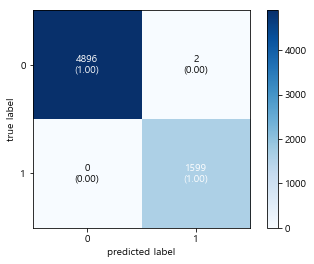

In [84]:
# 혼돈표 매트릭스 시각화
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plot_confusion_matrix(conf_mat = md_cm,
                                show_absolute = True,
                                show_normed = True,
                                colorbar = True)

In [85]:
# 혼돈표 성능해석
from sklearn.metrics import classification_report

print(classification_report(y, md_y_pred,
                            target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      4898
     class 1       1.00      1.00      1.00      1599

   micro avg       1.00      1.00      1.00      6497
   macro avg       1.00      1.00      1.00      6497
weighted avg       1.00      1.00      1.00      6497



# <font color = 'blue'>딥러닝 훈련모델 미니배치 작업진행상황(에포크파일) 저장</font>
* 미니배치 방식으로 1회 에포크(epoch)마다 부분 샘플데이터셋(batch_size)을 통해 진행하는 
<br> 딥러닝 학습실행 과정을 개별파일로 일일이 저장하고, 이 중 베스트 모델을 선택함 

### 에포크파일 저장용 경로와 폴더 설정

In [86]:
# 현재 작업경로 확인
import os
os.getcwd()

'C:\\my\\OneDrive\\mcpy\\modu'

In [87]:
# 현재 작업경로내 파일&폴더 목록 확인
os.listdir()

['.idea',
 '.ipynb_checkpoints',
 '006958-master.zip',
 '00_Q리스트.ipynb',
 '01_선형회귀_최소제곱법_모두의 딥러닝_3장(p.42).ipynb',
 '01_환경설정.ipynb',
 '02_기초딥.ipynb',
 '02_선형회귀_경사하강법_모두의 딥러닝_4장(p.63).ipynb',
 '03_로지스틱회귀_모두의 딥러닝_5장(p.79).ipynb',
 '04_단층다층퍼셉트론_오차역전파_심층신경망_모두의 딥러닝_6장-9장.ipynb',
 '05_이진분류_피마당뇨병 데이터셋_모두의 딥러닝_10장(p-Copy1.122)_11장(p.130).ipynb',
 '05_이진분류_피마당뇨병 데이터셋_모두의 딥러닝_10장(p.122)_11장(p.130).ipynb',
 '06_다중분류_아이리스 데이터셋_모두의 딥러닝_12장(p.146).ipynb',
 '07_데이터분할 과적합방지_소나신호 광물탐지 데이터셋_모두의 딥러닝_13장(p.155).ipynb',
 '08_데이터분할 과적합방지_와인품질 데이터셋_모두의 딥러닝_13장(p.155).ipynb',
 '09_베스트모델만들기_와인품질 데이터셋_모두의 딥러닝_14장(p.174).ipynb',
 '09_베스트모델만들기_와인품질 데이터셋_모두의 딥러닝_14장(p.174).pdf',
 '10_수치예측_보스턴 주택가격 데이터셋_모두의 딥러닝_15장(p-Copy1.196).ipynb',
 '10_수치예측_보스턴 주택가격 데이터셋_모두의 딥러닝_15장(p.196).ipynb',
 '16_CNN 이미지인식-Copy1.ipynb',
 '16_CNN 이미지인식-Copy2.ipynb',
 '16_CNN 이미지인식.ipynb',
 '2017, (조태호), 모두의 딥러닝.pdf',
 'dataset',
 'deep_class',
 'deep_code',
 'images',
 'jupyternotebok20160815-160810063255.pdf',
 'model',
 'modu.zip',
 'no

In [88]:
# 현재 작업경로내 폴더목록만 확인
import glob
for i in glob.glob('*'):
    if os.path.isdir(i):
        print(i)

# 축약형으로 구현
[i for i in glob.glob('*') if os.path.isdir(i)]

dataset
deep_class
deep_code
images
model
Untitled Folder
파이썬북


['dataset',
 'deep_class',
 'deep_code',
 'images',
 'model',
 'Untitled Folder',
 '파이썬북']

In [89]:
# 현재 작업경로내 파일목록만 확인
for i in glob.glob('*'):
    if os.path.isfile(i):
        print(i)
        
# 축약형으로 구현
[i for i in glob.glob('*') if os.path.isfile(i)]

006958-master.zip
00_Q리스트.ipynb
01_선형회귀_최소제곱법_모두의 딥러닝_3장(p.42).ipynb
01_환경설정.ipynb
02_기초딥.ipynb
02_선형회귀_경사하강법_모두의 딥러닝_4장(p.63).ipynb
03_로지스틱회귀_모두의 딥러닝_5장(p.79).ipynb
04_단층다층퍼셉트론_오차역전파_심층신경망_모두의 딥러닝_6장-9장.ipynb
05_이진분류_피마당뇨병 데이터셋_모두의 딥러닝_10장(p-Copy1.122)_11장(p.130).ipynb
05_이진분류_피마당뇨병 데이터셋_모두의 딥러닝_10장(p.122)_11장(p.130).ipynb
06_다중분류_아이리스 데이터셋_모두의 딥러닝_12장(p.146).ipynb
07_데이터분할 과적합방지_소나신호 광물탐지 데이터셋_모두의 딥러닝_13장(p.155).ipynb
08_데이터분할 과적합방지_와인품질 데이터셋_모두의 딥러닝_13장(p.155).ipynb
09_베스트모델만들기_와인품질 데이터셋_모두의 딥러닝_14장(p.174).ipynb
09_베스트모델만들기_와인품질 데이터셋_모두의 딥러닝_14장(p.174).pdf
10_수치예측_보스턴 주택가격 데이터셋_모두의 딥러닝_15장(p-Copy1.196).ipynb
10_수치예측_보스턴 주택가격 데이터셋_모두의 딥러닝_15장(p.196).ipynb
16_CNN 이미지인식-Copy1.ipynb
16_CNN 이미지인식-Copy2.ipynb
16_CNN 이미지인식.ipynb
2017, (조태호), 모두의 딥러닝.pdf
jupyternotebok20160815-160810063255.pdf
modu.zip
notebook.tex
output_27_1.png
output_31_1.png
output_77_1.png
output_87_1.png
pima_new.csv
Rtest.ipynb
모두딥러닝 그림.pptx
모두딥러닝 그림_20181129.pptx
모두딥러닝 그림_20181203.pptx
모두딥러닝 그림_20181209.pptx
모두의_딥러

['006958-master.zip',
 '00_Q리스트.ipynb',
 '01_선형회귀_최소제곱법_모두의 딥러닝_3장(p.42).ipynb',
 '01_환경설정.ipynb',
 '02_기초딥.ipynb',
 '02_선형회귀_경사하강법_모두의 딥러닝_4장(p.63).ipynb',
 '03_로지스틱회귀_모두의 딥러닝_5장(p.79).ipynb',
 '04_단층다층퍼셉트론_오차역전파_심층신경망_모두의 딥러닝_6장-9장.ipynb',
 '05_이진분류_피마당뇨병 데이터셋_모두의 딥러닝_10장(p-Copy1.122)_11장(p.130).ipynb',
 '05_이진분류_피마당뇨병 데이터셋_모두의 딥러닝_10장(p.122)_11장(p.130).ipynb',
 '06_다중분류_아이리스 데이터셋_모두의 딥러닝_12장(p.146).ipynb',
 '07_데이터분할 과적합방지_소나신호 광물탐지 데이터셋_모두의 딥러닝_13장(p.155).ipynb',
 '08_데이터분할 과적합방지_와인품질 데이터셋_모두의 딥러닝_13장(p.155).ipynb',
 '09_베스트모델만들기_와인품질 데이터셋_모두의 딥러닝_14장(p.174).ipynb',
 '09_베스트모델만들기_와인품질 데이터셋_모두의 딥러닝_14장(p.174).pdf',
 '10_수치예측_보스턴 주택가격 데이터셋_모두의 딥러닝_15장(p-Copy1.196).ipynb',
 '10_수치예측_보스턴 주택가격 데이터셋_모두의 딥러닝_15장(p.196).ipynb',
 '16_CNN 이미지인식-Copy1.ipynb',
 '16_CNN 이미지인식-Copy2.ipynb',
 '16_CNN 이미지인식.ipynb',
 '2017, (조태호), 모두의 딥러닝.pdf',
 'jupyternotebok20160815-160810063255.pdf',
 'modu.zip',
 'notebook.tex',
 'output_27_1.png',
 'output_31_1.png',
 'output_77_1.png',
 'output_87_1.png',
 '

In [90]:
# 딥러닝 학습모델 에포크파일 저장용 폴더 설정

md_dir = './model/'
# - 저장폴더명 설정(문자열형식)

if not os.path.exists(md_dir):
    os.mkdir(md_dir)
# - 해당 폴더가 하드디스크에 없으면 생성하기

In [91]:
# 에포크파일 저장용 폴더 생성되었는지 확인
for i in glob.glob('model'):
    if os.path.isdir(i):
        print(i)

# 축약형으로 구현
[i for i in glob.glob('model') if os.path.isdir(i)]

model


['model']

## (1) 학습모델 체크포인트 설정

### 에포크파일 저장용 파일명 설정

In [92]:
# 에포크파일 저장용 파일명 설정(문자열 형식으로 저장)
md_path = './model/{epoch:d}_{loss:.3f}.hdf5'

# - ./model/ 저장될 폴더를 상대경로로 지정함
# - {epoch:d} 단위배치(batch) 작업인 에포크번호를 정수형으로 파일명 시작부분에 기록
# - {loss:.3f} 각 학습모델의 훈련데이터 오차정도를 소수3째자리까지 파일에 기록
# - .hdf5 파일확장자를 계층적 데이터 형식(Hierarchical Data Format, HDF)으로 지정함

# 미니배치방식으로 딥러닝 모델 훈련시 생성되는 에포크 파일의 주요 성능정보
# - loss: 전체데이터 중 학습셋(training) 학습오차
# - acc: 전체데이터 중 학습셋(training) 정확도
# - val_loss: 전체데이터 중 검증셋(validation) 오차
# - val_acc: 전체데이터 중 검증셋(validation) 정확도

# ==> model.fit() 함수사용시 훈련셋을 통해 loss, acc값을 도출함
# ==> 추가적으로 validation_split = 비율 이나 validation_data = (피처, 타겟) 옵션으로 
#     검증셋을 지정해 주어야 val_loss, val_acc값을 도출할 수 있음

### 학습모델 체크포인트(checkpoint) 설정

In [93]:
# 학습모델 체크포인트 모듈 로딩
from keras.callbacks import ModelCheckpoint

In [94]:
# 체크포인트(checkpoint) 설정
cp = ModelCheckpoint(filepath = md_path, 
                     monitor = 'loss', 
                     verbose = 1)
# - filepath: 각 학습모델별 성능평가 파일저장 경로
# - monitor 옵션: 각 학습모델별 성능평가 기준
#   * 전체데이터 중 학습셋(training) 학습오차: loss
#   * 전체데이터 중 학습셋(training) 정확도: acc
#   * 전체데이터 중 검증셋(validation) 오차: val_loss
#   * 전체데이터 중 검증셋(validation) 정확도: val_acc
#   * 전체데이터 중 시험셋(테스트; test)은 별도로 분할해 놓아야 함
# - verbose: 모델별 학습진행사항 출력

### 딥러닝 모델 훈련 계층&방법 설정

In [95]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

np.random.seed(myseed)
tf.set_random_seed(myseed)

# 모델 훈련계층 설정
md = Sequential()

md.add(Dense(30, input_dim = 12, activation = 'relu'))
md.add(Dense(12, activation = 'relu'))
md.add(Dense(8, activation = 'relu'))
md.add(Dense(1, activation = 'sigmoid'))

# 모델 훈련방법 설정
md.compile(loss = 'binary_crossentropy', 
           optimizer = 'adam', metrics = ['accuracy'])

### 딥러닝 모델 최적화 훈련진행

In [96]:
# 딥러닝 모델 최적화 훈련진행
# - 준비된 훈련계층과 훈련방법에 따라 미니배치(mini-batch) 방식으로 최적화 훈련진행
# - 훈련데이터셋을 한번에 투입해 또는 한개 샘플씩 학습을 하지 않고, 
#   일부(batch_size) 단위샘플로 나누어서 부분적으로 학습을 진행함
# - 미니배치를 하나씩 학습모델에 투입해 손실함수값을 줄이기 위한 파라미터(가중치, 편향)를 조율해 나감
# - 각 미니배치별 손실함수값을 구하고, 이들의 평균적인 오차와 정확도를 해당 모델의 성능으로 판단함
# - 또한 미니배치 단위샘플을 모두 사용하는 일련의 학습과정(에포크: epoch)을 
#   한번에 끝내는 것이 아니라 여러차례 반복실시해 모델의 성능을 개선해 나감  

md.fit(X_rb, y, batch_size = 100, epochs = 200, 
       verbose = 1, callbacks = [cp])
# - 훈련셋을 10개 샘플씩 나누어 미니배치를 여러개 만들고 
#   이를 모두 활용하는 딥러닝 학습을 총 200번 반복실시함

# - batch_size: 훈련데이터셋중에서 몇개 샘플을 미니배치(mini-batch)로 만들것인지 설정
#   적게설정: 빠른 훈련속도이점. 단위샘플셋에 따라 학습편차가 많이 발생. 병렬연산 못하고 하드웨어 자원낭비
#   많이설정: 훈련속도가 느려짐. 지역최소값(local minimum)에 빠질 수 있음. 하드웨어 자원에 부하가 많이 발생함)
# - epochs: 미니배치를 모두 처리하는 일련의 학습을 몇 번 정도 실시할지 설정
#   적게설정: 파라미터조율이 충분하지 않아서 과소적합 가능성
#   많이설정: 파라미터조율이 지나쳐 과대적합 가능성

# - verbose = 1: 딥러닝 훈련모델 트레이닝 진행과정을 상세하게 출력할지 설정
# - callbacks = [cp]: 딥러닝 훈련모델 트레이닝이 진행될 때마다 
#   각 에포크파일 생성을 어떻게 할지 설정

# - 출력내용 중 
#   loss:훈련셋 오차, acc:훈런셋 정확도, 
#   ETA:estimated time of arrival
#   step: Weight와 Bias를 1회 업데이트하는 단위작업

Epoch 1/200
6497/6497 [==============================] - 1s 88us/step - loss: 0.4764 - acc: 0.7817

Epoch 00001: saving model to ./model/1_0.476.hdf5
Epoch 2/200
6497/6497 [==============================] - 0s 13us/step - loss: 0.1859 - acc: 0.9695

Epoch 00002: saving model to ./model/2_0.186.hdf5
Epoch 3/200
6497/6497 [==============================] - 0s 17us/step - loss: 0.0628 - acc: 0.9909

Epoch 00003: saving model to ./model/3_0.063.hdf5
Epoch 4/200
6497/6497 [==============================] - 0s 14us/step - loss: 0.0381 - acc: 0.9925

Epoch 00004: saving model to ./model/4_0.038.hdf5
Epoch 5/200
6497/6497 [==============================] - 0s 12us/step - loss: 0.0314 - acc: 0.9946

Epoch 00005: saving model to ./model/5_0.031.hdf5
Epoch 6/200
6497/6497 [==============================] - 0s 17us/step - loss: 0.0279 - acc: 0.9949

Epoch 00006: saving model to ./model/6_0.028.hdf5
Epoch 7/200
6497/6497 [==============================] - 0s 17us/step - loss: 0.0255 - acc: 0.9954



Epoch 55/200
6497/6497 [==============================] - 0s 14us/step - loss: 0.0054 - acc: 0.9988

Epoch 00055: saving model to ./model/55_0.005.hdf5
Epoch 56/200
6497/6497 [==============================] - 0s 16us/step - loss: 0.0051 - acc: 0.9988

Epoch 00056: saving model to ./model/56_0.005.hdf5
Epoch 57/200
6497/6497 [==============================] - 0s 14us/step - loss: 0.0050 - acc: 0.9988

Epoch 00057: saving model to ./model/57_0.005.hdf5
Epoch 58/200
6497/6497 [==============================] - 0s 17us/step - loss: 0.0048 - acc: 0.9991

Epoch 00058: saving model to ./model/58_0.005.hdf5
Epoch 59/200
6497/6497 [==============================] - 0s 13us/step - loss: 0.0046 - acc: 0.9989

Epoch 00059: saving model to ./model/59_0.005.hdf5
Epoch 60/200
6497/6497 [==============================] - 0s 13us/step - loss: 0.0046 - acc: 0.9989

Epoch 00060: saving model to ./model/60_0.005.hdf5
Epoch 61/200
6497/6497 [==============================] - 0s 15us/step - loss: 0.0043 - 

6497/6497 [==============================] - 0s 15us/step - loss: 5.5650e-04 - acc: 0.9997

Epoch 00159: saving model to ./model/159_0.001.hdf5
Epoch 160/200
6497/6497 [==============================] - 0s 12us/step - loss: 5.5837e-04 - acc: 0.9997

Epoch 00160: saving model to ./model/160_0.001.hdf5
Epoch 161/200
6497/6497 [==============================] - 0s 10us/step - loss: 5.5081e-04 - acc: 0.9997

Epoch 00161: saving model to ./model/161_0.001.hdf5
Epoch 162/200
6497/6497 [==============================] - 0s 11us/step - loss: 5.4521e-04 - acc: 0.9997

Epoch 00162: saving model to ./model/162_0.001.hdf5
Epoch 163/200
6497/6497 [==============================] - 0s 10us/step - loss: 5.4599e-04 - acc: 0.9997

Epoch 00163: saving model to ./model/163_0.001.hdf5
Epoch 164/200
6497/6497 [==============================] - 0s 10us/step - loss: 5.4865e-04 - acc: 0.9997

Epoch 00164: saving model to ./model/164_0.001.hdf5
Epoch 165/200
6497/6497 [==============================] - 0s 13us

### 모델 성능평가

In [97]:
md_perf = md.evaluate(X_rb, y)
md_loss = md_perf[0]
md_acc = md_perf[1]

print('모델성능 종합:', [round(i, 3) for i in md_perf])
print(f'모델성능 오차(loss): {md_loss:11.3f}')
print(f'모델성능 정확도(accuracy): {md_acc:0.3f}')

6497/6497 [==============================] - 0s 25us/step
모델성능 종합: [0.001, 1.0]
모델성능 오차(loss):       0.001
모델성능 정확도(accuracy): 1.000


### 모델 혼동표만들기

In [98]:
# 예측값 도출
md_y_pred = md.predict_classes(X_rb)

md_y_pred[0:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [99]:
# 혼돈표 매트릭스
from sklearn.metrics import confusion_matrix
md_cm = confusion_matrix(y, md_y_pred)
md_cm

array([[4896,    2],
       [   0, 1599]], dtype=int64)

In [100]:
# 혼돈표 sum 추가
pd.crosstab(y, md_y_pred.reshape(-1), 
            rownames = ['True'], colnames = ['Predicted'], 
            margins = True)

Predicted,0,1,All
True,,,
0,4896,2,4898
1,0,1599,1599
All,4896,1601,6497


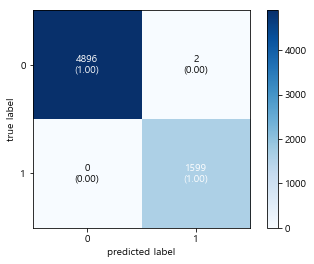

In [101]:
# 혼돈표 매트릭스 시각화
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plot_confusion_matrix(conf_mat = md_cm,
                                show_absolute = True,
                                show_normed = True,
                                colorbar = True)

In [102]:
# 혼돈표 성능해석
from sklearn.metrics import classification_report

print(classification_report(y, md_y_pred,
                            target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      4898
     class 1       1.00      1.00      1.00      1599

   micro avg       1.00      1.00      1.00      6497
   macro avg       1.00      1.00      1.00      6497
weighted avg       1.00      1.00      1.00      6497



### 에포크 파일 생성결과 확인

In [103]:
# 에포크 파일 생성결과 확인

files = [i for i in os.listdir('./model') 
         if os.path.isfile(os.path.join('./model', i))]
# - 에포크 저장폴더내 전체 파일목록 조회

ep_files = [i for i in files if i.find(".hdf5") != -1] 
# - 에포크 저장폴더내 전체 파일목록 중 에포크 파일만 조회

print(f'생성된 에포크 파일갯수: {len(ep_files)}개')
# - 에포크 파일갯수

ep_files
# - 에포크 파일명

생성된 에포크 파일갯수: 200개


['100_0.001.hdf5',
 '101_0.001.hdf5',
 '102_0.001.hdf5',
 '103_0.001.hdf5',
 '104_0.001.hdf5',
 '105_0.001.hdf5',
 '106_0.001.hdf5',
 '107_0.001.hdf5',
 '108_0.001.hdf5',
 '109_0.001.hdf5',
 '10_0.021.hdf5',
 '110_0.001.hdf5',
 '111_0.001.hdf5',
 '112_0.001.hdf5',
 '113_0.001.hdf5',
 '114_0.001.hdf5',
 '115_0.001.hdf5',
 '116_0.001.hdf5',
 '117_0.005.hdf5',
 '118_0.005.hdf5',
 '119_0.002.hdf5',
 '11_0.020.hdf5',
 '120_0.003.hdf5',
 '121_0.001.hdf5',
 '122_0.001.hdf5',
 '123_0.001.hdf5',
 '124_0.001.hdf5',
 '125_0.001.hdf5',
 '126_0.001.hdf5',
 '127_0.001.hdf5',
 '128_0.001.hdf5',
 '129_0.001.hdf5',
 '12_0.020.hdf5',
 '130_0.001.hdf5',
 '131_0.001.hdf5',
 '132_0.001.hdf5',
 '133_0.001.hdf5',
 '134_0.001.hdf5',
 '135_0.001.hdf5',
 '136_0.001.hdf5',
 '137_0.001.hdf5',
 '138_0.001.hdf5',
 '139_0.001.hdf5',
 '13_0.019.hdf5',
 '140_0.001.hdf5',
 '141_0.001.hdf5',
 '142_0.001.hdf5',
 '143_0.001.hdf5',
 '144_0.001.hdf5',
 '145_0.001.hdf5',
 '146_0.001.hdf5',
 '147_0.001.hdf5',
 '148_0.001.hdf5

## (2) 학습모델 체크포인트 베스트모델 저장 설정

### 에포크파일 저장용 파일명 설정

In [104]:
# 딥러닝 학습모델별 저장파일명 설정
md2_path = './model/ep_best{epoch:d}_loss{loss:.3f}_acc{acc:.3f}.hdf5'

# - ./model/ 저장될 폴더를 상대경로로 지정함
# - {epoch:d} 단위배치(batch) 작업인 에포크번호를 정수형으로 파일명 시작부분에 기록
# - {loss:.3f} 각 학습모델의 훈련데이터 오차정도를 소수3째자리까지 파일에 기록
# - {acc:.3f} 각 학습모델의 훈련데이터 정확성정도를 소수3째자리까지 파일에 기록
# - .hdf5 파일확장자를 계층적 데이터 형식(Hierarchical Data Format, HDF)으로 지정함

# 미니배치방식으로 딥러닝 모델 훈련시 생성되는 에포크 파일의 주요 성능정보
# - loss: 전체데이터 중 학습셋(training) 학습오차
# - acc: 전체데이터 중 학습셋(training) 정확도
# - val_loss: 전체데이터 중 검증셋(validation) 오차
# - val_acc: 전체데이터 중 검증셋(validation) 정확도

# ==> model.fit() 함수사용시 훈련셋을 통해 loss, acc값을 도출함
# ==> 추가적으로 validation_split = 비율 이나 validation_data = (피처, 타겟) 옵션으로 
#     검증셋을 지정해 주어야 val_loss, val_acc값을 도출할 수 있음

### 학습모델 체크포인트(checkpoint) 설정: 베스트모델 저장옵션 추가

In [105]:
# 체크포인트(checkpoint) 변경설정
cp2 = ModelCheckpoint(filepath = md2_path, 
                      monitor = 'loss', 
                      verbose = 1, 
                      save_best_only = True)
# - filepath: 각 학습모델별 성능평가 파일저장 경로
# - monitor 옵션: 각 학습모델별 성능평가 기준
#   * 전체데이터 중 학습셋(training) 학습오차: loss
#   * 전체데이터 중 학습셋(training) 정확도: acc
#   * 전체데이터 중 검증셋(validation) 오차: val_loss
#   * 전체데이터 중 검증셋(validation) 정확도: val_acc
#   * 전체데이터 중 시험셋(테스트; test)은 별도로 분할해 놓아야 함
# - verbose: 모델별 학습진행사항 출력
# - save_best_only: 각 학습모델별 성능평가 파일저장시
#                   이전 모델보다 성능이 좋아졌을 때만 저장하도록 함

### 딥러닝 모델 훈련 계층&방법 설정

In [106]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

np.random.seed(myseed)
tf.set_random_seed(myseed)

# 모델 훈련계층 설정
md2 = Sequential()

md2.add(Dense(30, input_dim = 12, activation = 'relu'))
md2.add(Dense(12, activation = 'relu'))
md2.add(Dense(8, activation = 'relu'))
md2.add(Dense(1, activation = 'sigmoid'))

# 모델 훈련방법 설정
md2.compile(loss = 'binary_crossentropy', 
            optimizer = 'adam', metrics = ['accuracy'])

### 딥러닝 모델 최적화 훈련진행

In [107]:
# 딥러닝 모델 최적화 훈련진행

md2.fit(X_rb, y, batch_size = 100, epochs = 200, 
        verbose = 1, callbacks = [cp2])

# - verbose = 1: 딥러닝 훈련모델 트레이닝 진행과정을 상세하게 출력할지 설정
# - callbacks = [cp2]: 딥러닝 훈련모델 트레이닝이 진행될 때마다 
#                      각 에포크파일 생성을 어떻게 할지 설정

Epoch 1/200
6497/6497 [==============================] - 1s 87us/step - loss: 0.4767 - acc: 0.7814

Epoch 00001: loss improved from inf to 0.47675, saving model to ./model/ep_best1_loss0.477_acc0.781.hdf5
Epoch 2/200
6497/6497 [==============================] - 0s 14us/step - loss: 0.1856 - acc: 0.9694

Epoch 00002: loss improved from 0.47675 to 0.18561, saving model to ./model/ep_best2_loss0.186_acc0.969.hdf5
Epoch 3/200
6497/6497 [==============================] - 0s 13us/step - loss: 0.0628 - acc: 0.9909

Epoch 00003: loss improved from 0.18561 to 0.06279, saving model to ./model/ep_best3_loss0.063_acc0.991.hdf5
Epoch 4/200
6497/6497 [==============================] - 0s 13us/step - loss: 0.0381 - acc: 0.9925

Epoch 00004: loss improved from 0.06279 to 0.03807, saving model to ./model/ep_best4_loss0.038_acc0.992.hdf5
Epoch 5/200
6497/6497 [==============================] - 0s 13us/step - loss: 0.0313 - acc: 0.9946

Epoch 00005: loss improved from 0.03807 to 0.03126, saving model to 

Epoch 40/200
6497/6497 [==============================] - 0s 17us/step - loss: 0.0090 - acc: 0.9980

Epoch 00040: loss improved from 0.00915 to 0.00901, saving model to ./model/ep_best40_loss0.009_acc0.998.hdf5
Epoch 41/200
6497/6497 [==============================] - 0s 20us/step - loss: 0.0088 - acc: 0.9980

Epoch 00041: loss improved from 0.00901 to 0.00877, saving model to ./model/ep_best41_loss0.009_acc0.998.hdf5
Epoch 42/200
6497/6497 [==============================] - 0s 19us/step - loss: 0.0085 - acc: 0.9978

Epoch 00042: loss improved from 0.00877 to 0.00850, saving model to ./model/ep_best42_loss0.009_acc0.998.hdf5
Epoch 43/200
6497/6497 [==============================] - 0s 13us/step - loss: 0.0078 - acc: 0.9982

Epoch 00043: loss improved from 0.00850 to 0.00784, saving model to ./model/ep_best43_loss0.008_acc0.998.hdf5
Epoch 44/200
6497/6497 [==============================] - 0s 21us/step - loss: 0.0073 - acc: 0.9982

Epoch 00044: loss improved from 0.00784 to 0.00731, sav

Epoch 79/200
6497/6497 [==============================] - 0s 14us/step - loss: 0.0018 - acc: 0.9995

Epoch 00079: loss did not improve from 0.00174
Epoch 80/200
6497/6497 [==============================] - 0s 23us/step - loss: 0.0016 - acc: 0.9995

Epoch 00080: loss improved from 0.00174 to 0.00161, saving model to ./model/ep_best80_loss0.002_acc1.000.hdf5
Epoch 81/200
6497/6497 [==============================] - 0s 15us/step - loss: 0.0016 - acc: 0.9995

Epoch 00081: loss improved from 0.00161 to 0.00156, saving model to ./model/ep_best81_loss0.002_acc1.000.hdf5
Epoch 82/200
6497/6497 [==============================] - 0s 18us/step - loss: 0.0015 - acc: 0.9995

Epoch 00082: loss improved from 0.00156 to 0.00149, saving model to ./model/ep_best82_loss0.001_acc1.000.hdf5
Epoch 83/200
6497/6497 [==============================] - 0s 24us/step - loss: 0.0014 - acc: 0.9995

Epoch 00083: loss improved from 0.00149 to 0.00145, saving model to ./model/ep_best83_loss0.001_acc1.000.hdf5
Epoch 84

6497/6497 [==============================] - 0s 14us/step - loss: 5.5409e-04 - acc: 0.9997

Epoch 00169: loss did not improve from 0.00053
Epoch 170/200
6497/6497 [==============================] - 0s 16us/step - loss: 5.5583e-04 - acc: 0.9997

Epoch 00170: loss did not improve from 0.00053
Epoch 171/200
6497/6497 [==============================] - 0s 14us/step - loss: 5.5031e-04 - acc: 0.9997

Epoch 00171: loss did not improve from 0.00053
Epoch 172/200
6497/6497 [==============================] - 0s 15us/step - loss: 5.5845e-04 - acc: 0.9997

Epoch 00172: loss did not improve from 0.00053
Epoch 173/200
6497/6497 [==============================] - 0s 20us/step - loss: 5.4975e-04 - acc: 0.9997

Epoch 00173: loss did not improve from 0.00053
Epoch 174/200
6497/6497 [==============================] - 0s 11us/step - loss: 5.5124e-04 - acc: 0.9997

Epoch 00174: loss did not improve from 0.00053
Epoch 175/200
6497/6497 [==============================] - 0s 12us/step - loss: 5.4390e-04 - acc

### 모델 성능평가

In [108]:
md2_perf = md2.evaluate(X_rb, y)
md2_loss = md2_perf[0]
md2_acc = md2_perf[1]

print('모델성능 종합:', [round(i, 3) for i in md2_perf])
print(f'모델성능 오차(loss): {md2_loss:11.3f}')
print(f'모델성능 정확도(accuracy): {md2_acc:0.3f}')

6497/6497 [==============================] - 0s 28us/step
모델성능 종합: [0.001, 1.0]
모델성능 오차(loss):       0.001
모델성능 정확도(accuracy): 1.000


### 모델 혼동표만들기

In [109]:
# 예측값 도출
md2_y_pred = md2.predict_classes(X_rb)

md2_y_pred[0:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [110]:
# 혼돈표 매트릭스
from sklearn.metrics import confusion_matrix
md2_cm = confusion_matrix(y, md2_y_pred)
md2_cm

array([[4896,    2],
       [   0, 1599]], dtype=int64)

In [111]:
# 혼돈표 sum 추가
pd.crosstab(y, md2_y_pred.reshape(-1), 
            rownames = ['True'], colnames = ['Predicted'], 
            margins = True)

Predicted,0,1,All
True,,,
0,4896,2,4898
1,0,1599,1599
All,4896,1601,6497


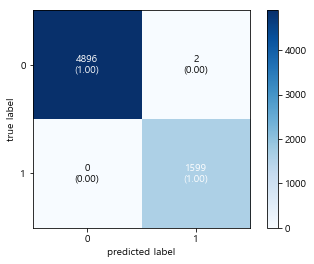

In [112]:
# 혼돈표 매트릭스 시각화
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plot_confusion_matrix(conf_mat = md2_cm,
                                show_absolute = True,
                                show_normed = True,
                                colorbar = True)

In [113]:
# 혼돈표 성능해석
from sklearn.metrics import classification_report

print(classification_report(y, md2_y_pred,
                            target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      4898
     class 1       1.00      1.00      1.00      1599

   micro avg       1.00      1.00      1.00      6497
   macro avg       1.00      1.00      1.00      6497
weighted avg       1.00      1.00      1.00      6497



In [114]:
# 에포크 파일 생성결과 확인

files = [i for i in os.listdir('./model') 
         if os.path.isfile(os.path.join('./model', i))]
# - 에포크 저장폴더내 전체 파일목록 조회


ep_files = [i for i in files if i.find("best") != -1] 
# - 에포크 저장폴더내 전체 파일목록 중 에포크 파일만 조회

print(f'생성된 에포크 파일갯수: {len(ep_files)}개')
# - 에포크 파일갯수

ep_files
# - 에포크 파일명

생성된 에포크 파일갯수: 120개


['ep_best100_loss0.001_acc0.999.hdf5',
 'ep_best101_loss0.001_acc0.999.hdf5',
 'ep_best102_loss0.001_acc0.999.hdf5',
 'ep_best103_loss0.001_acc1.000.hdf5',
 'ep_best104_loss0.001_acc1.000.hdf5',
 'ep_best106_loss0.001_acc1.000.hdf5',
 'ep_best107_loss0.001_acc1.000.hdf5',
 'ep_best108_loss0.001_acc1.000.hdf5',
 'ep_best10_loss0.021_acc0.996.hdf5',
 'ep_best111_loss0.001_acc1.000.hdf5',
 'ep_best114_loss0.001_acc1.000.hdf5',
 'ep_best118_loss0.001_acc1.000.hdf5',
 'ep_best119_loss0.001_acc1.000.hdf5',
 'ep_best11_loss0.020_acc0.996.hdf5',
 'ep_best121_loss0.001_acc1.000.hdf5',
 'ep_best123_loss0.001_acc1.000.hdf5',
 'ep_best124_loss0.001_acc1.000.hdf5',
 'ep_best129_loss0.001_acc1.000.hdf5',
 'ep_best12_loss0.020_acc0.996.hdf5',
 'ep_best130_loss0.001_acc1.000.hdf5',
 'ep_best138_loss0.001_acc1.000.hdf5',
 'ep_best13_loss0.019_acc0.996.hdf5',
 'ep_best142_loss0.001_acc1.000.hdf5',
 'ep_best143_loss0.001_acc1.000.hdf5',
 'ep_best147_loss0.001_acc1.000.hdf5',
 'ep_best148_loss0.001_acc1.0

### (3) 학습모델 체크포인트 훈련셋&검증셋 성능저장 설정

### 에포크파일 저장용 파일명 설정

In [115]:
# 딥러닝 학습모델별 저장파일명 변경설정
md3_path = './model/ep{epoch:d}_loss{loss:.3f}_vloss{val_loss:.3f}_acc{acc:.3f}_vacc{val_acc:.3f}.hdf5'

# - ./model/ 저장될 폴더를 상대경로로 지정함
# - {epoch:d} 단위배치(batch) 작업인 에포크번호를 정수형으로 파일명 시작부분에 기록
# - {loss:.3f} 각 학습모델의 훈련데이터 오차정도를 소수3째자리까지 파일에 기록
# - {acc:.3f} 각 학습모델의 훈련데이터 정확성정도를 소수3째자리까지 파일에 기록
# - {vloss:.3f} 각 학습모델의 검증데이터 오차정도를 소수3째자리까지 파일에 기록
# - {vacc:.3f} 각 학습모델의 검증데이터 정확성정도를 소수3째자리까지 파일에 기록
# - .hdf5 파일확장자를 계층적 데이터 형식(Hierarchical Data Format, HDF)으로 지정함

# 미니배치방식으로 딥러닝 모델 훈련시 생성되는 에포크 파일의 주요 성능정보
# - loss: 전체데이터 중 학습셋(training) 학습오차
# - acc: 전체데이터 중 학습셋(training) 정확도
# - val_loss: 전체데이터 중 검증셋(validation) 오차
# - val_acc: 전체데이터 중 검증셋(validation) 정확도

# ==> model.fit() 함수사용시 훈련셋을 통해 loss, acc값을 도출함
# ==> 추가적으로 validation_split = 비율 이나 validation_data = (피처, 타겟) 옵션으로 
#     검증셋을 지정해 주어야 val_loss, val_acc값을 도출할 수 있음

### 학습모델 체크포인트(checkpoint) 설정

In [116]:
# 체크포인트(checkpoint) 변경설정
cp3 = ModelCheckpoint(filepath = md3_path, 
                      monitor = 'val_loss', 
                      verbose = 1, 
                      save_best_only = True)
# - filepath: 각 학습모델별 성능평가 파일저장 경로
# - monitor 옵션: 각 학습모델별 성능평가 기준
#   * 전체데이터 중 학습셋(training) 학습오차: loss
#   * 전체데이터 중 학습셋(training) 정확도: acc
#   * 전체데이터 중 검증셋(validation) 오차: val_loss
#   * 전체데이터 중 검증셋(validation) 정확도: val_acc
#   * 전체데이터 중 시험셋(테스트; test)은 별도로 분할해 놓아야 함
# - verbose: 모델별 학습진행사항 출력
# - save_best_only: 각 학습모델별 성능평가 파일저장시
#                   이전 모델보다 성능이 좋아졌을 때만 저장하도록 함

### 딥러닝 모델 훈련 계층&방법 설정

In [117]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

np.random.seed(myseed)
tf.set_random_seed(myseed)

# 모델 훈련계층 설정
md3 = Sequential()

md3.add(Dense(30, input_dim = 12, activation = 'relu'))
md3.add(Dense(12, activation = 'relu'))
md3.add(Dense(8, activation = 'relu'))
md3.add(Dense(1, activation = 'sigmoid'))

# 모델 훈련방법 설정
md3.compile(loss = 'binary_crossentropy', 
            optimizer = 'adam', metrics = ['accuracy'])

### 딥러닝 모델 최적화 훈련진행: 검증셋(validation) 교차검증 옵션설정

In [118]:
# 딥러닝 모델 최적화 훈련진행

md3.fit(X_rb, y, batch_size = 100, epochs = 200,
        validation_split = 0.2, 
        verbose = 1, callbacks = [cp3])

# - validation_split = 0.2: 전체데이터 중 
#   학습셋(training) 80%, 검증셋(validation) 20%로 분할하는 비율설정
# - verbose = 1: 딥러닝 훈련모델 트레이닝 진행과정을 상세하게 출력할지 설정
# - callbacks = [cp]: 딥러닝 훈련모델 트레이닝이 진행될 때마다 
#   각 에포크파일 생성을 어떻게 할지 설정

Train on 5197 samples, validate on 1300 samples
Epoch 1/200
5197/5197 [==============================] - 1s 135us/step - loss: 0.5455 - acc: 0.7218 - val_loss: 0.2163 - val_acc: 0.9992

Epoch 00001: val_loss improved from inf to 0.21629, saving model to ./model/ep1_loss0.545_vloss0.216_acc0.722_vacc0.999.hdf5
Epoch 2/200
5197/5197 [==============================] - 0s 15us/step - loss: 0.2864 - acc: 0.9402 - val_loss: 0.0538 - val_acc: 0.9985

Epoch 00002: val_loss improved from 0.21629 to 0.05378, saving model to ./model/ep2_loss0.286_vloss0.054_acc0.940_vacc0.998.hdf5
Epoch 3/200
5197/5197 [==============================] - 0s 16us/step - loss: 0.1102 - acc: 0.9861 - val_loss: 0.0240 - val_acc: 0.9954

Epoch 00003: val_loss improved from 0.05378 to 0.02396, saving model to ./model/ep3_loss0.110_vloss0.024_acc0.986_vacc0.995.hdf5
Epoch 4/200
5197/5197 [==============================] - 0s 15us/step - loss: 0.0505 - acc: 0.9898 - val_loss: 0.0143 - val_acc: 0.9962

Epoch 00004: val_los

5197/5197 [==============================] - 0s 15us/step - loss: 0.0134 - acc: 0.9969 - val_loss: 0.0081 - val_acc: 0.9977

Epoch 00039: val_loss did not improve from 0.00539
Epoch 40/200
5197/5197 [==============================] - 0s 23us/step - loss: 0.0132 - acc: 0.9971 - val_loss: 0.0079 - val_acc: 0.9977

Epoch 00040: val_loss did not improve from 0.00539
Epoch 41/200
5197/5197 [==============================] - 0s 20us/step - loss: 0.0127 - acc: 0.9973 - val_loss: 0.0083 - val_acc: 0.9969

Epoch 00041: val_loss did not improve from 0.00539
Epoch 42/200
5197/5197 [==============================] - 0s 17us/step - loss: 0.0124 - acc: 0.9971 - val_loss: 0.0074 - val_acc: 0.9969

Epoch 00042: val_loss did not improve from 0.00539
Epoch 43/200
5197/5197 [==============================] - 0s 14us/step - loss: 0.0121 - acc: 0.9969 - val_loss: 0.0088 - val_acc: 0.9969

Epoch 00043: val_loss did not improve from 0.00539
Epoch 44/200
5197/5197 [==============================] - 0s 16us/st

5197/5197 [==============================] - 0s 12us/step - loss: 0.0012 - acc: 0.9994 - val_loss: 0.0113 - val_acc: 0.9969

Epoch 00125: val_loss did not improve from 0.00539
Epoch 126/200
5197/5197 [==============================] - 0s 12us/step - loss: 0.0013 - acc: 0.9992 - val_loss: 0.0015 - val_acc: 1.0000

Epoch 00126: val_loss improved from 0.00539 to 0.00149, saving model to ./model/ep126_loss0.001_vloss0.001_acc0.999_vacc1.000.hdf5
Epoch 127/200
5197/5197 [==============================] - ETA: 0s - loss: 0.0063 - acc: 0.9980    - 0s 15us/step - loss: 0.0186 - acc: 0.9969 - val_loss: 0.0251 - val_acc: 0.9931

Epoch 00127: val_loss did not improve from 0.00149
Epoch 128/200
5197/5197 [==============================] - 0s 14us/step - loss: 0.0109 - acc: 0.9973 - val_loss: 0.0105 - val_acc: 0.9977

Epoch 00128: val_loss did not improve from 0.00149
Epoch 129/200
5197/5197 [==============================] - 0s 14us/step - loss: 0.0063 - acc: 0.9983 - val_loss: 0.0199 - val_acc: 0

### 모델 성능평가

In [119]:
md3_perf = md3.evaluate(X_rb, y)
md3_loss = md3_perf[0]
md3_acc = md3_perf[1]

print('모델성능 종합:', [round(i, 3) for i in md3_perf])
print(f'모델성능 오차(loss): {md3_loss:11.3f}')
print(f'모델성능 정확도(accuracy): {md3_acc:0.3f}')

6497/6497 [==============================] - 0s 23us/step
모델성능 종합: [0.003, 0.999]
모델성능 오차(loss):       0.003
모델성능 정확도(accuracy): 0.999


### 모델 혼동표만들기

In [120]:
# 예측값 도출
md3_y_pred = md3.predict_classes(X_rb)

md3_y_pred[0:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [121]:
# 혼돈표 매트릭스
from sklearn.metrics import confusion_matrix
md3_cm = confusion_matrix(y, md3_y_pred)
md3_cm

array([[4892,    6],
       [   0, 1599]], dtype=int64)

In [122]:
# 혼돈표 sum 추가
pd.crosstab(y, md3_y_pred.reshape(-1), 
            rownames = ['True'], colnames = ['Predicted'], 
            margins = True)

Predicted,0,1,All
True,,,
0,4892,6,4898
1,0,1599,1599
All,4892,1605,6497


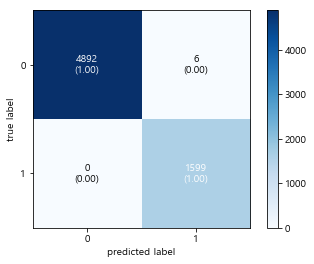

In [123]:
# 혼돈표 매트릭스 시각화
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plot_confusion_matrix(conf_mat = md3_cm,
                                show_absolute = True,
                                show_normed = True,
                                colorbar = True)

In [124]:
# 혼돈표 성능해석
from sklearn.metrics import classification_report

print(classification_report(y, md3_y_pred,
                            target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      4898
     class 1       1.00      1.00      1.00      1599

   micro avg       1.00      1.00      1.00      6497
   macro avg       1.00      1.00      1.00      6497
weighted avg       1.00      1.00      1.00      6497



### 에포크 파일 생성결과 확인

In [125]:
# 에포크 파일 생성결과 확인

files = [i for i in os.listdir('./model') 
         if os.path.isfile(os.path.join('./model', i))]
# - 에포크 저장폴더내 전체 파일목록 조회


ep_files = [i for i in files if i.find("vloss") != -1] 
# - 에포크 저장폴더내 전체 파일목록 중 에포크 파일만 조회

print(f'생성된 에포크 파일갯수: {len(ep_files)}개')
# - 에포크 파일갯수

ep_files
# - 에포크 파일명

생성된 에포크 파일갯수: 13개


['ep10_loss0.027_vloss0.009_acc0.995_vacc0.997.hdf5',
 'ep126_loss0.001_vloss0.001_acc0.999_vacc1.000.hdf5',
 'ep13_loss0.024_vloss0.008_acc0.996_vacc0.997.hdf5',
 'ep16_loss0.022_vloss0.007_acc0.996_vacc0.998.hdf5',
 'ep18_loss0.021_vloss0.005_acc0.996_vacc0.999.hdf5',
 'ep1_loss0.545_vloss0.216_acc0.722_vacc0.999.hdf5',
 'ep2_loss0.286_vloss0.054_acc0.940_vacc0.998.hdf5',
 'ep3_loss0.110_vloss0.024_acc0.986_vacc0.995.hdf5',
 'ep4_loss0.051_vloss0.014_acc0.990_vacc0.996.hdf5',
 'ep5_loss0.039_vloss0.014_acc0.992_vacc0.996.hdf5',
 'ep6_loss0.034_vloss0.012_acc0.994_vacc0.996.hdf5',
 'ep7_loss0.031_vloss0.011_acc0.994_vacc0.997.hdf5',
 'ep8_loss0.029_vloss0.010_acc0.994_vacc0.997.hdf5']

# <font color = 'blue'>딥러닝 과적합 방지용 학습 자동중단 옵션설정</font>
* 미니배치 방식으로 1회 에포크(epoch)마다 부분 샘플데이터셋(batch_size)을 통해 
<br>훈련데이터셋으로 딥러닝 학습을 진행하면서 오차를 줄여나감
* 그런데 훈련셋 오차는 작어지는데 반해, 테스트셋 오차는 줄어들지 않은 경우
<br>과적합 가능성이 있으므로 훈련을 자동으로 중단시키는 옵션이 필요함

### 에포크파일 저장용 파일명 설정

In [126]:
# 딥러닝 학습모델별 저장파일명 변경설정
md4_path = './model/ep_stop_{epoch:d}_loss{loss:.3f}_vloss{val_loss:.3f}_acc{acc:.3f}_vacc{val_acc:.3f}.hdf5'

# - ./model/ 저장될 폴더를 상대경로로 지정함
# - {epoch:d} 단위배치(batch) 작업인 에포크번호를 정수형으로 파일명 시작부분에 기록
# - {loss:.3f} 각 학습모델의 훈련데이터 오차정도를 소수3째자리까지 파일에 기록
# - {acc:.3f} 각 학습모델의 훈련데이터 정확성정도를 소수3째자리까지 파일에 기록
# - {vloss:.3f} 각 학습모델의 검증데이터 오차정도를 소수3째자리까지 파일에 기록
# - {vacc:.3f} 각 학습모델의 검증데이터 정확성정도를 소수3째자리까지 파일에 기록
# - .hdf5 파일확장자를 계층적 데이터 형식(Hierarchical Data Format, HDF)으로 지정함

# 미니배치방식으로 딥러닝 모델 훈련시 생성되는 에포크 파일의 주요 성능정보
# - loss: 전체데이터 중 학습셋(training) 학습오차
# - acc: 전체데이터 중 학습셋(training) 정확도
# - val_loss: 전체데이터 중 검증셋(validation) 오차
# - val_acc: 전체데이터 중 검증셋(validation) 정확도

# ==> model.fit() 함수사용시 훈련셋을 통해 loss, acc값을 도출함
# ==> 추가적으로 validation_split = 비율 이나 validation_data = (피처, 타겟) 옵션으로 
#     검증셋을 지정해 주어야 val_loss, val_acc값을 도출할 수 있음

### 학습모델 체크포인트(checkpoint) 설정

In [127]:
# 체크포인트(checkpoint) 변경설정
cp4 = ModelCheckpoint(filepath = md4_path, 
                      monitor = 'val_loss', 
                      verbose = 1, 
                      save_best_only = True)
# - filepath: 각 학습모델별 성능평가 파일저장 경로
# - monitor 옵션: 각 학습모델별 성능평가 기준
#   * 전체데이터 중 학습셋(training) 학습오차: loss
#   * 전체데이터 중 학습셋(training) 정확도: acc
#   * 전체데이터 중 검증셋(validation) 오차: val_loss
#   * 전체데이터 중 검증셋(validation) 정확도: val_acc
#   * 전체데이터 중 시험셋(테스트; test)은 별도로 분할해 놓아야 함
# - verbose: 모델별 학습진행사항 출력
# - save_best_only: 각 학습모델별 성능평가 파일저장시
#                   이전 모델보다 성능이 좋아졌을 때만 저장하도록 함

### 딥러닝 학습의 과적합을 방지하기 위한 옵션 설정

In [128]:
# 과적합 방지용 종료 메서드 로딩
from keras.callbacks import EarlyStopping

In [129]:
# 조기종료 옵션설정
es = EarlyStopping(monitor = 'val_loss', patience = 100)
# - monitor: 검증셋 대상 모니터할 값 설정
# - patience: 검증셋 오차가 좋아지지 않아도 몇 번까지 기다릴지 설정 100번정도 성능개선이 안되도 학습시키겠다.
# 학습을 1000번이상 했을 경우 100정도로 하는게 좋다. 
# 지금은 200번학습시키는데 patience를 100으로 두는건 별로다. patience의 수를 줄여라!

### 딥러닝 모델 훈련 계층&방법 설정

In [130]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

np.random.seed(myseed)
tf.set_random_seed(myseed)

# 모델 훈련계층 설정
md4 = Sequential()

md4.add(Dense(30, input_dim = 12, activation = 'relu'))
md4.add(Dense(12, activation = 'relu'))
md4.add(Dense(8, activation = 'relu'))
md4.add(Dense(1, activation = 'sigmoid'))

# 모델 훈련방법 설정
md4.compile(loss = 'binary_crossentropy', 
            optimizer = 'adam', metrics = ['accuracy'])

### 딥러닝 모델 최적화 훈련진행

In [131]:
# 딥러닝 모델 최적화 훈련진행

md4.fit(X_rb, y, batch_size = 100, epochs = 200, 
        validation_split = 0.2, 
        verbose = 1, callbacks = [cp4, es])

# - validation_split = 0.2: 전체데이터 중 
#   학습셋(training) 80%, 검증셋(validation) 20%로 분할하는 비율설정
# - verbose = 1: 딥러닝 훈련모델 트레이닝 진행과정을 상세하게 출력할지 설정
# - callbacks = [cp]: 딥러닝 훈련모델 트레이닝이 진행될 때마다 
#                     각 에포크파일 생성을 어떻게 할지 설정
#             = [es]: 딥러닝 과적합방지용 조기종료 옵션 설정

Train on 5197 samples, validate on 1300 samples
Epoch 1/200
5197/5197 [==============================] - 1s 142us/step - loss: 0.5452 - acc: 0.7216 - val_loss: 0.2161 - val_acc: 0.9992

Epoch 00001: val_loss improved from inf to 0.21611, saving model to ./model/ep_stop_1_loss0.545_vloss0.216_acc0.722_vacc0.999.hdf5
Epoch 2/200
5197/5197 [==============================] - 0s 15us/step - loss: 0.2865 - acc: 0.9400 - val_loss: 0.0538 - val_acc: 0.9985

Epoch 00002: val_loss improved from 0.21611 to 0.05378, saving model to ./model/ep_stop_2_loss0.286_vloss0.054_acc0.940_vacc0.998.hdf5
Epoch 3/200
5197/5197 [==============================] - 0s 15us/step - loss: 0.1104 - acc: 0.9861 - val_loss: 0.0240 - val_acc: 0.9954

Epoch 00003: val_loss improved from 0.05378 to 0.02399, saving model to ./model/ep_stop_3_loss0.110_vloss0.024_acc0.986_vacc0.995.hdf5
Epoch 4/200
5197/5197 [==============================] - 0s 21us/step - loss: 0.0506 - acc: 0.9898 - val_loss: 0.0143 - val_acc: 0.9962

Ep

5197/5197 [==============================] - 0s 20us/step - loss: 0.0133 - acc: 0.9969 - val_loss: 0.0082 - val_acc: 0.9969

Epoch 00039: val_loss did not improve from 0.00538
Epoch 40/200
5197/5197 [==============================] - 0s 19us/step - loss: 0.0131 - acc: 0.9971 - val_loss: 0.0085 - val_acc: 0.9977

Epoch 00040: val_loss did not improve from 0.00538
Epoch 41/200
5197/5197 [==============================] - 0s 16us/step - loss: 0.0126 - acc: 0.9973 - val_loss: 0.0086 - val_acc: 0.9969

Epoch 00041: val_loss did not improve from 0.00538
Epoch 42/200
5197/5197 [==============================] - 0s 17us/step - loss: 0.0123 - acc: 0.9971 - val_loss: 0.0076 - val_acc: 0.9969

Epoch 00042: val_loss did not improve from 0.00538
Epoch 43/200
5197/5197 [==============================] - 0s 18us/step - loss: 0.0120 - acc: 0.9971 - val_loss: 0.0091 - val_acc: 0.9962

Epoch 00043: val_loss did not improve from 0.00538
Epoch 44/200
5197/5197 [==============================] - 0s 20us/st

5197/5197 [==============================] - 0s 20us/step - loss: 0.0013 - acc: 0.9992 - val_loss: 0.0110 - val_acc: 0.9962

Epoch 00125: val_loss did not improve from 0.00469
Epoch 126/200
5197/5197 [==============================] - 0s 16us/step - loss: 0.0012 - acc: 0.9994 - val_loss: 0.0094 - val_acc: 0.9969

Epoch 00126: val_loss did not improve from 0.00469
Epoch 127/200
5197/5197 [==============================] - 0s 16us/step - loss: 0.0012 - acc: 0.9994 - val_loss: 0.0093 - val_acc: 0.9962

Epoch 00127: val_loss did not improve from 0.00469
Epoch 128/200
5197/5197 [==============================] - 0s 23us/step - loss: 0.0013 - acc: 0.9994 - val_loss: 0.0110 - val_acc: 0.9962

Epoch 00128: val_loss did not improve from 0.00469
Epoch 129/200
5197/5197 [==============================] - 0s 20us/step - loss: 0.0012 - acc: 0.9994 - val_loss: 0.0110 - val_acc: 0.9962

Epoch 00129: val_loss did not improve from 0.00469
Epoch 130/200
5197/5197 [==============================] - 0s 16

5197/5197 [==============================] - 0s 23us/step - loss: 9.0926e-04 - acc: 0.9996 - val_loss: 0.0096 - val_acc: 0.9969

Epoch 00168: val_loss did not improve from 0.00469
Epoch 169/200
5197/5197 [==============================] - 0s 22us/step - loss: 9.0284e-04 - acc: 0.9996 - val_loss: 0.0096 - val_acc: 0.9969

Epoch 00169: val_loss did not improve from 0.00469
Epoch 170/200
5197/5197 [==============================] - 0s 19us/step - loss: 8.9987e-04 - acc: 0.9996 - val_loss: 0.0083 - val_acc: 0.9977

Epoch 00170: val_loss did not improve from 0.00469
Epoch 171/200
5197/5197 [==============================] - 0s 21us/step - loss: 8.8983e-04 - acc: 0.9996 - val_loss: 0.0078 - val_acc: 0.9977

Epoch 00171: val_loss did not improve from 0.00469
Epoch 172/200
5197/5197 [==============================] - 0s 21us/step - loss: 9.7359e-04 - acc: 0.9994 - val_loss: 0.0116 - val_acc: 0.9962

Epoch 00172: val_loss did not improve from 0.00469
Epoch 173/200
5197/5197 [===================

### 모델 성능평가

In [132]:
md4_perf = md4.evaluate(X_rb, y)
md4_loss = md4_perf[0]
md4_acc = md4_perf[1]

print('모델성능 종합:', [round(i, 3) for i in md4_perf])
print(f'모델성능       오차(loss): {md4_loss:0.3f}')
print(f'모델성능 정확도(accuracy): {md4_acc:0.3f}')

6497/6497 [==============================] - 0s 26us/step
모델성능 종합: [0.002, 0.999]
모델성능       오차(loss): 0.002
모델성능 정확도(accuracy): 0.999


### 모델 혼동표만들기

In [133]:
# 예측값 도출
md4_y_pred = md4.predict_classes(X_rb)

md4_y_pred[0:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [134]:
# 혼돈표 매트릭스
from sklearn.metrics import confusion_matrix
md4_cm = confusion_matrix(y, md4_y_pred)
md4_cm

array([[4893,    5],
       [   0, 1599]], dtype=int64)

In [135]:
# 혼돈표 sum 추가
pd.crosstab(y, md4_y_pred.reshape(-1), 
            rownames = ['True'], colnames = ['Predicted'], 
            margins = True)

Predicted,0,1,All
True,,,
0,4893,5,4898
1,0,1599,1599
All,4893,1604,6497


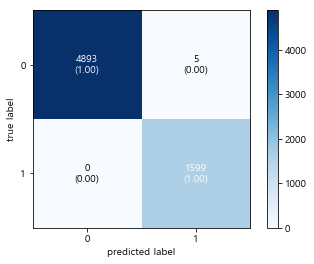

In [136]:
# 혼돈표 매트릭스 시각화
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plot_confusion_matrix(conf_mat = md4_cm,
                                show_absolute = True,
                                show_normed = True,
                                colorbar = True)

In [137]:
# 혼돈표 성능해석
from sklearn.metrics import classification_report

print(classification_report(y, md4_y_pred,
                            target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      4898
     class 1       1.00      1.00      1.00      1599

   micro avg       1.00      1.00      1.00      6497
   macro avg       1.00      1.00      1.00      6497
weighted avg       1.00      1.00      1.00      6497



### 에포크 파일 생성결과 확인

In [138]:
# 에포크 파일 생성결과 확인

files = [i for i in os.listdir('./model') 
         if os.path.isfile(os.path.join('./model', i))]
# - 에포크 저장폴더내 전체 파일목록 조회


ep_files = [i for i in files if i.find("stop") != -1] 
# - 에포크 저장폴더내 전체 파일목록 중 에포크 파일만 조회

print(f'생성된 에포크 파일갯수: {len(ep_files)}개')
# - 에포크 파일갯수

ep_files
# - 에포크 파일명

생성된 에포크 파일갯수: 14개


['ep_stop_10_loss0.026_vloss0.009_acc0.995_vacc0.997.hdf5',
 'ep_stop_115_loss0.002_vloss0.005_acc0.999_vacc0.997.hdf5',
 'ep_stop_13_loss0.024_vloss0.008_acc0.996_vacc0.997.hdf5',
 'ep_stop_16_loss0.022_vloss0.007_acc0.996_vacc0.998.hdf5',
 'ep_stop_179_loss0.001_vloss0.004_acc1.000_vacc0.998.hdf5',
 'ep_stop_18_loss0.021_vloss0.005_acc0.996_vacc1.000.hdf5',
 'ep_stop_1_loss0.545_vloss0.216_acc0.722_vacc0.999.hdf5',
 'ep_stop_2_loss0.286_vloss0.054_acc0.940_vacc0.998.hdf5',
 'ep_stop_3_loss0.110_vloss0.024_acc0.986_vacc0.995.hdf5',
 'ep_stop_4_loss0.051_vloss0.014_acc0.990_vacc0.996.hdf5',
 'ep_stop_5_loss0.039_vloss0.014_acc0.992_vacc0.996.hdf5',
 'ep_stop_6_loss0.034_vloss0.012_acc0.994_vacc0.996.hdf5',
 'ep_stop_7_loss0.031_vloss0.011_acc0.994_vacc0.997.hdf5',
 'ep_stop_8_loss0.029_vloss0.010_acc0.994_vacc0.997.hdf5']

파일 이름을 보면 179번에서 멈춘것을 볼 수 있다.

# <font color = 'blue'>딥러닝 훈련실행 에포크파일생성 히스토리 관리</font>

### 에포크파일 저장용 파일명 설정

In [139]:
# 딥러닝 학습모델별 저장파일명 변경설정
md5_path = './model/ep_history_{epoch:d}_loss{loss:.3f}_vloss{val_loss:.3f}_acc{acc:.3f}_vacc{val_acc:.3f}.hdf5'

### 학습모델 체크포인트(checkpoint) 설정

In [140]:
# 체크포인트(checkpoint) 변경설정
cp5 = ModelCheckpoint(filepath = md5_path, 
                      monitor = 'val_loss', 
                      verbose = 1, 
                      save_best_only = True)

### 딥러닝 학습의 과적합을 방지하기 위한 옵션 설정

In [141]:
# 과적합 방지용 종료 메서드 로딩
from keras.callbacks import EarlyStopping

# 조기종료 옵션설정
es = EarlyStopping(monitor = 'val_loss', patience = 100)

### 딥러닝 모델 훈련 계층&방법 설정

In [142]:
# 무작위 시드넘버 설정으로 샘플 재현성 확보
myseed = 0

np.random.seed(myseed)
tf.set_random_seed(myseed)

# 모델 훈련계층 설정
md5 = Sequential()

md5.add(Dense(30, input_dim = 12, activation = 'relu'))
md5.add(Dense(12, activation = 'relu'))
md5.add(Dense(8, activation = 'relu'))
md5.add(Dense(1, activation = 'sigmoid'))

# 모델 훈련방법 설정
md5.compile(loss = 'binary_crossentropy', 
            optimizer = 'adam', metrics = ['accuracy'])

### 딥러닝 모델 최적화 훈련진행

In [143]:
# 최적화 훈련실행 및 에포크파일 성능평가 히스토리 저장
history = md5.fit(X_rb, y, batch_size = 100, epochs = 200,
                  validation_split = 0.2, 
                  verbose = 1, callbacks = [cp5, es])

# - 훈련셋의 오차(loss), 정확도(acc), 
#   검증셋의 오차(val_loss), 정확도(val_acc) 성능수치를
#   별도로 history에 저정해 활용

Train on 5197 samples, validate on 1300 samples
Epoch 1/200
5197/5197 [==============================] - 1s 232us/step - loss: 0.5457 - acc: 0.7216 - val_loss: 0.2164 - val_acc: 0.9992

Epoch 00001: val_loss improved from inf to 0.21638, saving model to ./model/ep_history_1_loss0.546_vloss0.216_acc0.722_vacc0.999.hdf5
Epoch 2/200
5197/5197 [==============================] - 0s 17us/step - loss: 0.2864 - acc: 0.9398 - val_loss: 0.0538 - val_acc: 0.9985

Epoch 00002: val_loss improved from 0.21638 to 0.05381, saving model to ./model/ep_history_2_loss0.286_vloss0.054_acc0.940_vacc0.998.hdf5
Epoch 3/200
5197/5197 [==============================] - 0s 17us/step - loss: 0.1098 - acc: 0.9860 - val_loss: 0.0239 - val_acc: 0.9954

Epoch 00003: val_loss improved from 0.05381 to 0.02394, saving model to ./model/ep_history_3_loss0.110_vloss0.024_acc0.986_vacc0.995.hdf5
Epoch 4/200
5197/5197 [==============================] - 0s 20us/step - loss: 0.0504 - acc: 0.9898 - val_loss: 0.0143 - val_acc: 0


Epoch 00038: val_loss did not improve from 0.00539
Epoch 39/200
5197/5197 [==============================] - 0s 13us/step - loss: 0.0134 - acc: 0.9969 - val_loss: 0.0081 - val_acc: 0.9977

Epoch 00039: val_loss did not improve from 0.00539
Epoch 40/200
5197/5197 [==============================] - 0s 19us/step - loss: 0.0132 - acc: 0.9971 - val_loss: 0.0078 - val_acc: 0.9977

Epoch 00040: val_loss did not improve from 0.00539
Epoch 41/200
5197/5197 [==============================] - 0s 21us/step - loss: 0.0127 - acc: 0.9973 - val_loss: 0.0083 - val_acc: 0.9969

Epoch 00041: val_loss did not improve from 0.00539
Epoch 42/200
5197/5197 [==============================] - 0s 26us/step - loss: 0.0124 - acc: 0.9971 - val_loss: 0.0074 - val_acc: 0.9977

Epoch 00042: val_loss did not improve from 0.00539
Epoch 43/200
5197/5197 [==============================] - 0s 28us/step - loss: 0.0121 - acc: 0.9969 - val_loss: 0.0088 - val_acc: 0.9969

Epoch 00043: val_loss did not improve from 0.00539
Epo


Epoch 00124: val_loss did not improve from 0.00454
Epoch 125/200
5197/5197 [==============================] - 0s 19us/step - loss: 0.0012 - acc: 0.9994 - val_loss: 0.0092 - val_acc: 0.9969

Epoch 00125: val_loss did not improve from 0.00454
Epoch 126/200
5197/5197 [==============================] - 0s 17us/step - loss: 0.0012 - acc: 0.9994 - val_loss: 0.0084 - val_acc: 0.9969

Epoch 00126: val_loss did not improve from 0.00454
Epoch 127/200
5197/5197 [==============================] - 0s 19us/step - loss: 0.0011 - acc: 0.9994 - val_loss: 0.0075 - val_acc: 0.9969

Epoch 00127: val_loss did not improve from 0.00454
Epoch 128/200
5197/5197 [==============================] - 0s 16us/step - loss: 0.0011 - acc: 0.9994 - val_loss: 0.0096 - val_acc: 0.9969

Epoch 00128: val_loss did not improve from 0.00454
Epoch 129/200
5197/5197 [==============================] - 0s 20us/step - loss: 0.0011 - acc: 0.9994 - val_loss: 0.0103 - val_acc: 0.9969

Epoch 00129: val_loss did not improve from 0.0045

### 모델 성능평가

In [144]:
md5_perf = md5.evaluate(X_rb, y)
md5_loss = md5_perf[0]
md5_acc = md5_perf[1]

print('모델성능 종합:', [round(i, 3) for i in md5_perf])
print(f'모델성능 오차(loss): {md5_loss:11.3f}')
print(f'모델성능 정확도(accuracy): {md5_acc:0.3f}')

6497/6497 [==============================] - 0s 19us/step
모델성능 종합: [0.002, 0.999]
모델성능 오차(loss):       0.002
모델성능 정확도(accuracy): 0.999


### 모델 혼동표만들기

In [145]:
# 예측값 도출
md5_y_pred = md5.predict_classes(X_rb)

md5_y_pred[0:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [146]:
# 혼돈표 매트릭스
from sklearn.metrics import confusion_matrix
md5_cm = confusion_matrix(y, md5_y_pred)
md5_cm

array([[4894,    4],
       [   1, 1598]], dtype=int64)

In [147]:
# 혼돈표 sum 추가
pd.crosstab(y, md5_y_pred.reshape(-1), 
            rownames = ['True'], colnames = ['Predicted'], 
            margins = True)

Predicted,0,1,All
True,,,
0,4894,4,4898
1,1,1598,1599
All,4895,1602,6497


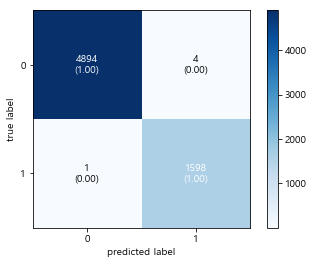

In [148]:
# 혼돈표 매트릭스 시각화
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plot_confusion_matrix(conf_mat = md5_cm,
                                show_absolute = True,
                                show_normed = True,
                                colorbar = True)

In [149]:
# 혼돈표 성능해석
from sklearn.metrics import classification_report

print(classification_report(y, md5_y_pred,
                            target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00      4898
     class 1       1.00      1.00      1.00      1599

   micro avg       1.00      1.00      1.00      6497
   macro avg       1.00      1.00      1.00      6497
weighted avg       1.00      1.00      1.00      6497



### 에포크 파일 생성결과 확인

In [150]:
# 에포크 파일 생성결과 확인

files = [i for i in os.listdir('./model') 
         if os.path.isfile(os.path.join('./model', i))]
# - 에포크 저장폴더내 전체 파일목록 조회


ep_files = [i for i in files if i.find("history") != -1] 
# - 에포크 저장폴더내 전체 파일목록 중 에포크 파일만 조회

print(f'생성된 에포크 파일갯수: {len(ep_files)}개')
# - 에포크 파일갯수

ep_files
# - 에포크 파일명

생성된 에포크 파일갯수: 13개


['ep_history_10_loss0.027_vloss0.009_acc0.995_vacc0.997.hdf5',
 'ep_history_13_loss0.024_vloss0.008_acc0.996_vacc0.997.hdf5',
 'ep_history_16_loss0.022_vloss0.007_acc0.996_vacc0.998.hdf5',
 'ep_history_18_loss0.021_vloss0.005_acc0.996_vacc1.000.hdf5',
 'ep_history_1_loss0.546_vloss0.216_acc0.722_vacc0.999.hdf5',
 'ep_history_2_loss0.286_vloss0.054_acc0.940_vacc0.998.hdf5',
 'ep_history_3_loss0.110_vloss0.024_acc0.986_vacc0.995.hdf5',
 'ep_history_4_loss0.050_vloss0.014_acc0.990_vacc0.996.hdf5',
 'ep_history_5_loss0.039_vloss0.014_acc0.992_vacc0.996.hdf5',
 'ep_history_6_loss0.034_vloss0.012_acc0.994_vacc0.996.hdf5',
 'ep_history_7_loss0.031_vloss0.011_acc0.994_vacc0.997.hdf5',
 'ep_history_8_loss0.029_vloss0.010_acc0.994_vacc0.997.hdf5',
 'ep_history_99_loss0.002_vloss0.005_acc0.999_vacc0.998.hdf5']

### 딥러닝 훈련실행 에포크파일 성능수치 결합

In [151]:
# 딥러닝 학습실시에 따른 성능평가 지표

# 훈련셋(training) 학습성능
y_loss = history.history['loss'] # 훈련셋 오차
y_acc = history.history['acc'] # 훈련셋 정확도

# 검증셋(validation) 학습성능
y_vloss = history.history['val_loss'] # 검증셋 오차
y_vacc = history.history['val_acc'] # 검증셋 정확도

# 딥러닝 학습실시에 따른 성능평가지표 객체형식과 규모
print(type(y_loss), len(y_loss))
print(type(y_acc), len(y_acc))
print(type(y_vloss), len(y_vloss))
print(type(y_vacc), len(y_vacc))

<class 'list'> 199
<class 'list'> 199
<class 'list'> 199
<class 'list'> 199


### 딥러닝 학습모델 성능평가 그래프

In [152]:
# x축 설정
# - epochs = 200에 의해서 딥러닝 학습모델이 200개 만들어저 진행됨에 따라
#   학습오차, 학습정확도, 검증오차, 검증정확도가 모두 200개 값이 생성됨
x_len = np.arange(len(y_acc))

#### 훈련셋 딥러닝학습 오차과 정확도 추이

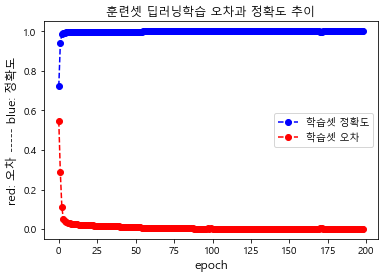

In [153]:
# 훈련셋 딥러닝학습 오차과 정확도 추이
plt.plot(x_len, y_acc, 'bo--', label = '학습셋 정확도')
plt.plot(x_len, y_loss, 'ro--', label = '학습셋 오차')
plt.title('훈련셋 딥러닝학습 오차과 정확도 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('red: 오차 ----- blue: 정확도', size = 12)
plt.legend()

# 마커설정 옵션 'bo--', 'ro--'
# --> color = 'blue', marker = 'o', linestyle = '--' 의미임
# --> color = 'red', marker = 'o', linestyle = '--' 의미임

#### 검증셋 딥러닝학습 오차과 정확도 추이

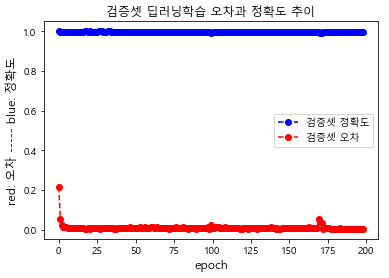

In [154]:
# 검증셋 딥러닝학습 오차과 정확도 추이
plt.plot(x_len, y_vacc, 'bo--', label = '검증셋 정확도')
plt.plot(x_len, y_vloss, 'ro--', label = '검증셋 오차')
plt.title('검증셋 딥러닝학습 오차과 정확도 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('red: 오차 ----- blue: 정확도', size = 12)
plt.legend()

#### 훈련셋 정확도와 검증셋 오차 추이
* 학습셋의 정확도는 에포크(epoch)가 실행될 수록 좋아짐
* 반면에 검증셋의 오차는 에포크가 실행될 수록 더이상 좋아지지 않음
* 따라서 에포크(epoch) 회수를 통해 적정한 딥러닝 모델학습 지정이 필요함 
* ==> 학습이 진행될수록 학습셋의 정확도는 올라가지만, 과적합으로 인해 검증셋의 학습결과는 점점 나빠지게 됨

<img src = './images/train_validation.png'>

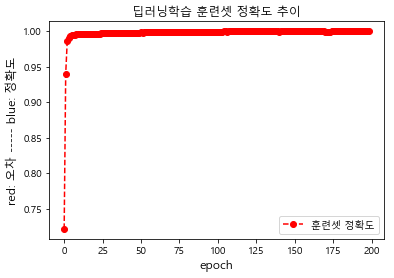

In [155]:
# 훈렷셋 딥러닝학습 정확도 추이
plt.plot(x_len, y_acc, color = 'red', marker = 'o', linestyle = '--', label = '훈련셋 정확도')
plt.title('딥러닝학습 훈련셋 정확도 추이')
plt.xlabel('epoch', size = 12)
plt.ylabel('red: 오차 ----- blue: 정확도', size = 12)
plt.legend()

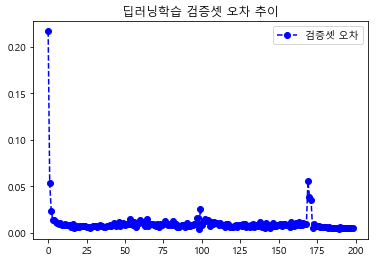

In [156]:
# 검증셋 딥러닝학습 오차 추이
plt.plot(x_len, y_vloss, color = 'blue', marker = 'o', linestyle = '--', label = '검증셋 오차')
plt.title('딥러닝학습 검증셋 오차 추이')
plt.legend()

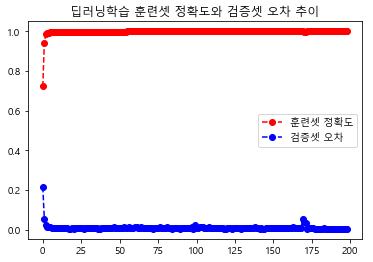

In [157]:
# 훈련셋 정확도와 검증셋 오차 추이
plt.plot(x_len, y_acc, color = 'red', marker = 'o', linestyle = '--', label = '훈련셋 정확도')
plt.plot(x_len, y_vloss, color = 'blue', marker = 'o', linestyle = '--', label = '검증셋 오차')
plt.title('딥러닝학습 훈련셋 정확도와 검증셋 오차 추이')
plt.legend()

# 마커설정 옵션: color = 'red', marker = 'o', linestyle = '--'
# --> 'ro--'로 축약해서 설정가능함

# End of Source